In [115]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [116]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [117]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [118]:
df.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [119]:
df.shape

(1525, 9)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [121]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [122]:
df.duplicated().sum()

8

In [123]:
df=df.drop_duplicates()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [125]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [126]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end=' ')
    
    print("Skew of " + column)
    print(df[column].skew(),end=' ')

    print("----------------------------------------------------------------------------")
    

    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df[column])
    plt.show()

In [127]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

7

Description of age
----------------------------------------------------------------------------
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64 Skew of age
0.13979987012068112 ----------------------------------------------------------------------------
Distribution of age
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


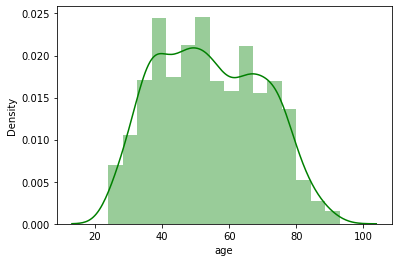

BoxPlot of age
----------------------------------------------------------------------------


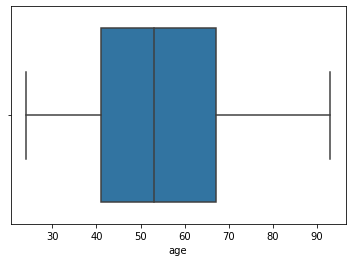

Description of economic.cond.national
----------------------------------------------------------------------------
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64 Skew of economic.cond.national
-0.23847421478161793 ----------------------------------------------------------------------------
Distribution of economic.cond.national
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


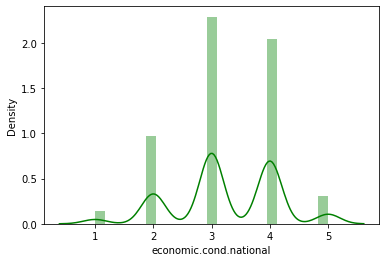

BoxPlot of economic.cond.national
----------------------------------------------------------------------------


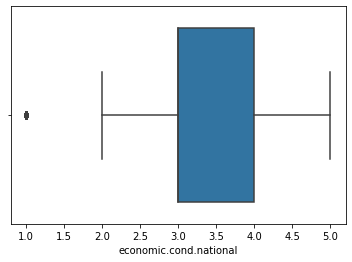

Description of economic.cond.household
----------------------------------------------------------------------------
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64 Skew of economic.cond.household
-0.14414766882077137 ----------------------------------------------------------------------------
Distribution of economic.cond.household
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


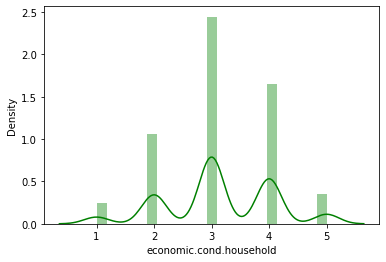

BoxPlot of economic.cond.household
----------------------------------------------------------------------------


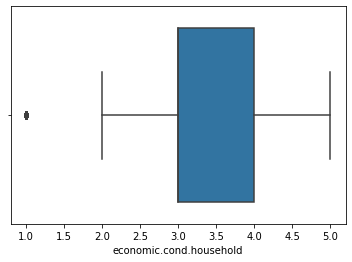

Description of Blair
----------------------------------------------------------------------------
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64 Skew of Blair
-0.5395141989831328 ----------------------------------------------------------------------------
Distribution of Blair
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


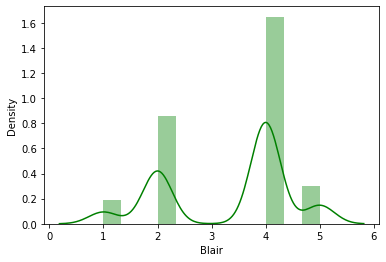

BoxPlot of Blair
----------------------------------------------------------------------------


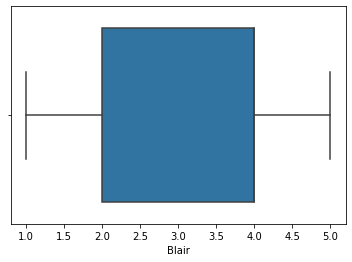

Description of Hague
----------------------------------------------------------------------------
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64 Skew of Hague
0.1461913444629453 ----------------------------------------------------------------------------
Distribution of Hague
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


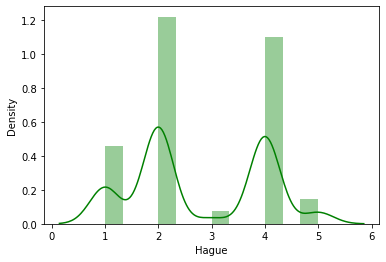

BoxPlot of Hague
----------------------------------------------------------------------------


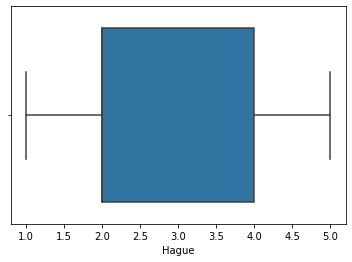

Description of Europe
----------------------------------------------------------------------------
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64 Skew of Europe
-0.14189094981032258 ----------------------------------------------------------------------------
Distribution of Europe
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


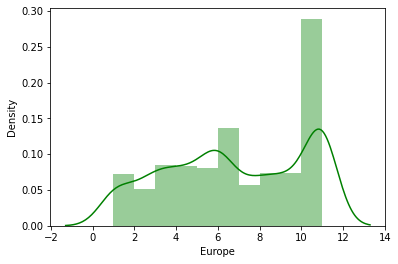

BoxPlot of Europe
----------------------------------------------------------------------------


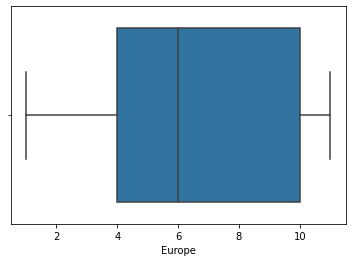

Description of political.knowledge
----------------------------------------------------------------------------
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64 Skew of political.knowledge
-0.4229276205374301 ----------------------------------------------------------------------------
Distribution of political.knowledge
----------------------------------------------------------------------------


C:\Users\Kinshuk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


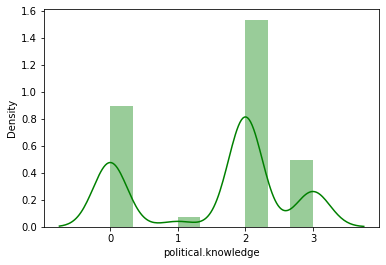

BoxPlot of political.knowledge
----------------------------------------------------------------------------


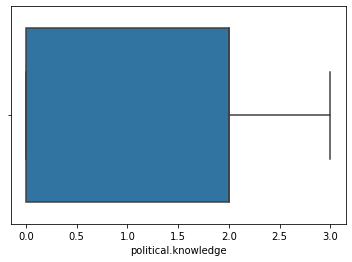

In [128]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [129]:
def univariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column], data=df);
    plt.show()
    
   



In [130]:
df_cat = df.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
len(lstcatcolumns)

2

Count Plot of vote
----------------------------------------------------------------------------


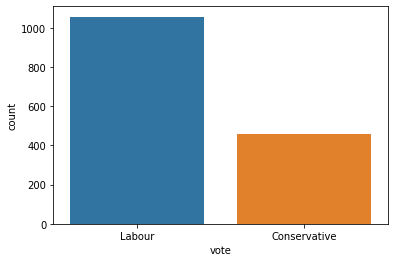

Count Plot of gender
----------------------------------------------------------------------------


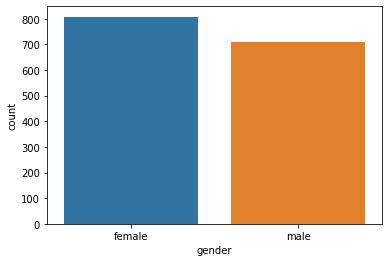

In [131]:
for x in lstcatcolumns:
    univariateAnalysis_cat(x,20)

In [132]:
def bivariateAnalysis_cat(column,nbins):
    
    
    plt.figure()
    print("Count Plot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df[column],data=df,hue=df['vote']) ;
    plt.show()
    




In [133]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [134]:
df_bi = df[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge','gender']]
lstcatcolumns = list(df_bi.columns.values)
len(lstcatcolumns)


8

Count Plot of age
----------------------------------------------------------------------------


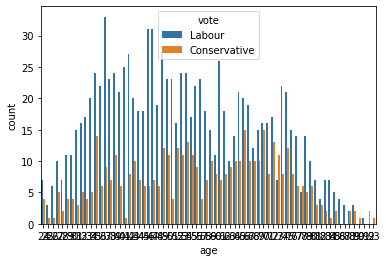

Count Plot of economic.cond.national
----------------------------------------------------------------------------


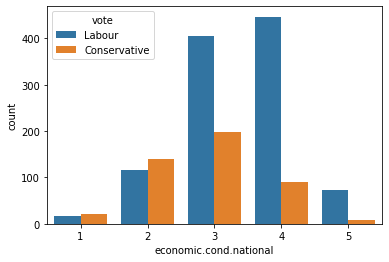

Count Plot of economic.cond.household
----------------------------------------------------------------------------


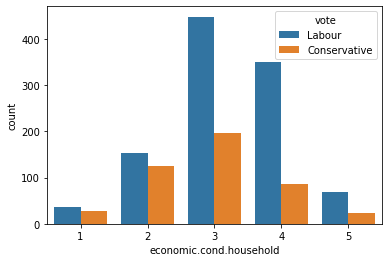

Count Plot of Blair
----------------------------------------------------------------------------


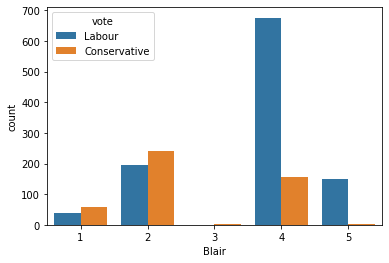

Count Plot of Hague
----------------------------------------------------------------------------


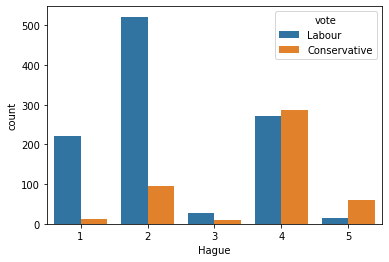

Count Plot of Europe
----------------------------------------------------------------------------


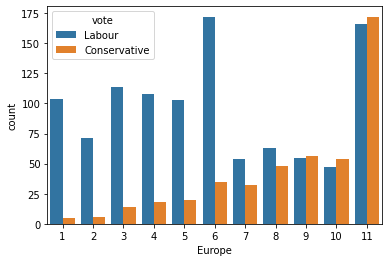

Count Plot of political.knowledge
----------------------------------------------------------------------------


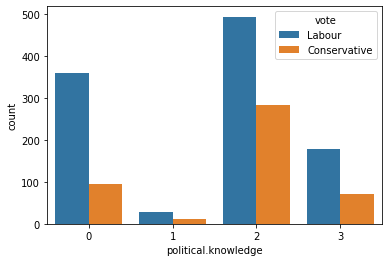

Count Plot of gender
----------------------------------------------------------------------------


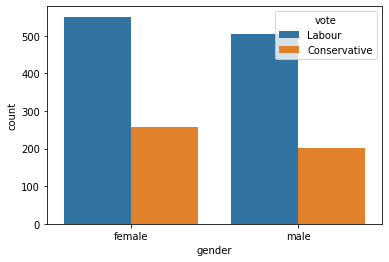

In [135]:
for x in lstcatcolumns:
    bivariateAnalysis_cat(x,20)

<AxesSubplot:>

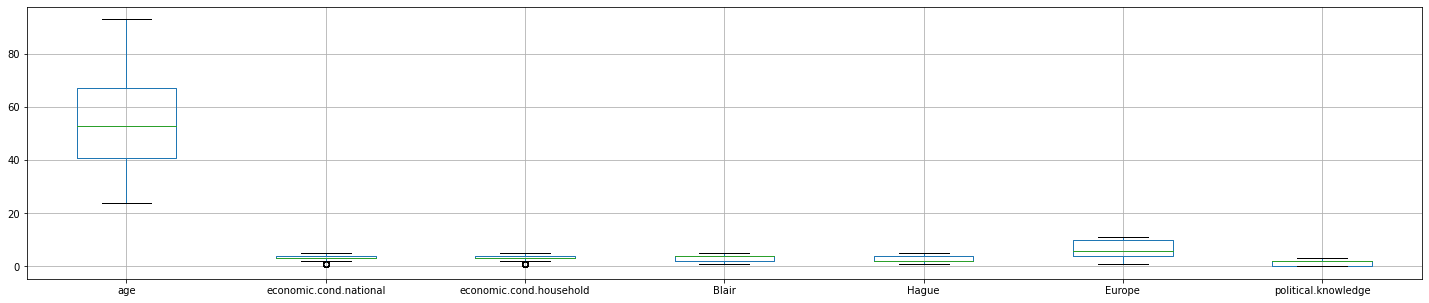

In [136]:
plt.figure(figsize=(25,5))
df.boxplot()

In [137]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [138]:
for feature in df[['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

<ipython-input-138-70753ec28db8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=np.where(df[feature]>ur,ur,df[feature])
<ipython-input-138-70753ec28db8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature]=np.where(df[feature]<lr,lr,df[feature])
<ipython-input-138-70753ec28db8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

<AxesSubplot:>

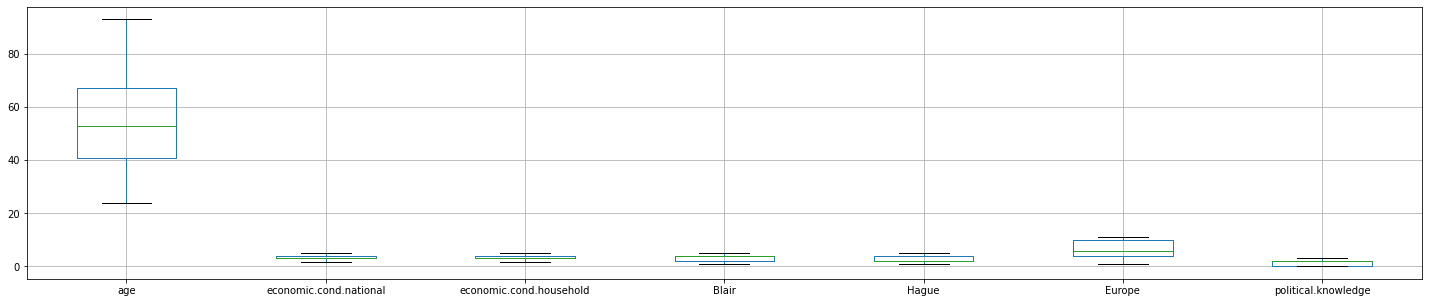

In [139]:
plt.figure(figsize=(25,5))
df.boxplot()

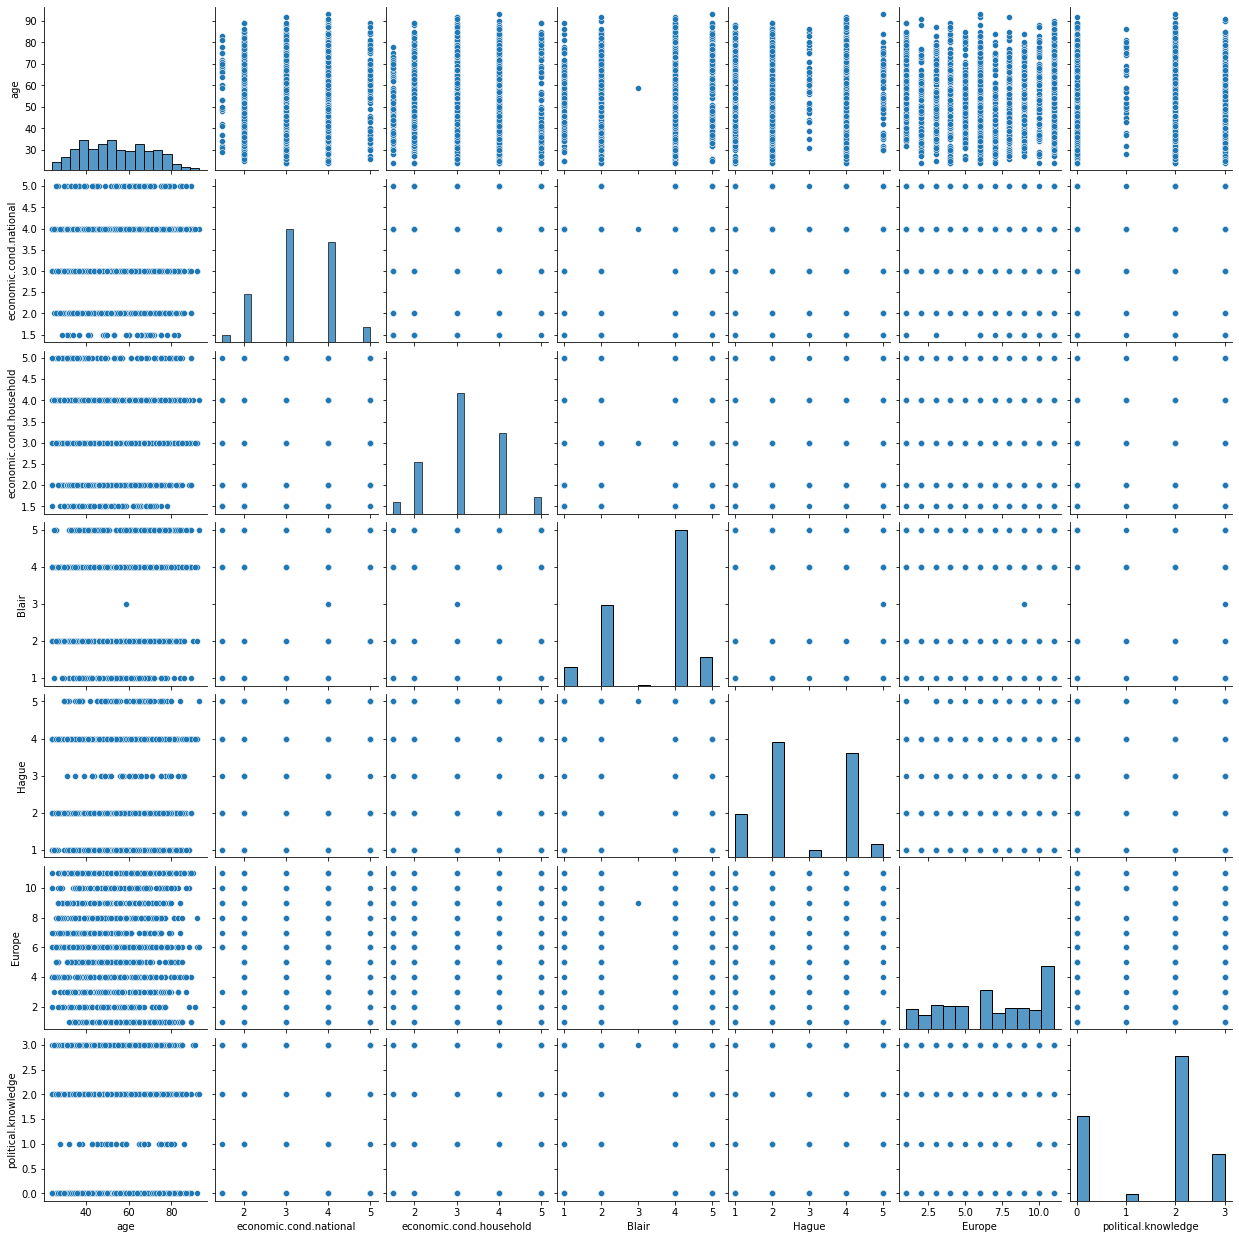

In [140]:
sns.pairplot(df)


In [141]:
corr = df_num.corr(method='pearson')

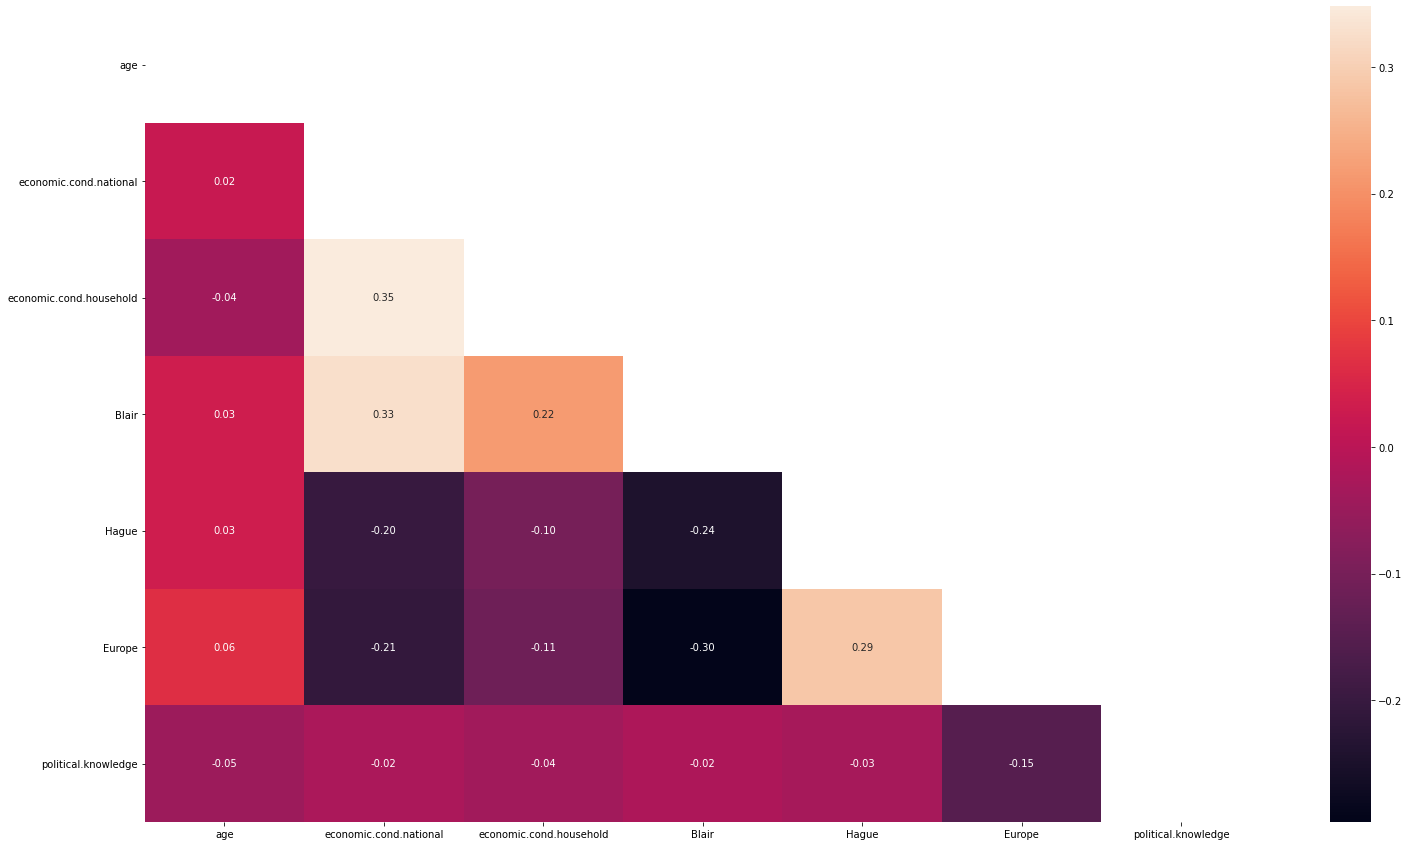

In [142]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df_num.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

# 1.3 Encoding

In [143]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3.0,3.0,4.0,1.0,2.0,2.0,female
1,Labour,36,4.0,4.0,4.0,4.0,5.0,2.0,male
2,Labour,35,4.0,4.0,5.0,2.0,3.0,2.0,male
3,Labour,24,4.0,2.0,2.0,1.0,4.0,0.0,female
4,Labour,41,2.0,2.0,1.0,1.0,6.0,2.0,male


In [144]:
for i in df.columns:
    if(df[i].dtype=='O'):
        df[i]=pd.Categorical(df[i]).codes

<ipython-input-144-9d71686c8bc8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=pd.Categorical(df[i]).codes


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1517 non-null   int8   
 1   age                      1517 non-null   int64  
 2   economic.cond.national   1517 non-null   float64
 3   economic.cond.household  1517 non-null   float64
 4   Blair                    1517 non-null   float64
 5   Hague                    1517 non-null   float64
 6   Europe                   1517 non-null   float64
 7   political.knowledge      1517 non-null   float64
 8   gender                   1517 non-null   int8   
dtypes: float64(6), int64(1), int8(2)
memory usage: 137.8 KB


In [146]:
df.head() #IT IS TO BE NOTED THAT Labour =1,Conservative =0, Female=0,Male=1

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3.0,3.0,4.0,1.0,2.0,2.0,0
1,1,36,4.0,4.0,4.0,4.0,5.0,2.0,1
2,1,35,4.0,4.0,5.0,2.0,3.0,2.0,1
3,1,24,4.0,2.0,2.0,1.0,4.0,0.0,0
4,1,41,2.0,2.0,1.0,1.0,6.0,2.0,1


In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

In [148]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [149]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)


In [150]:
mm=MinMaxScaler()
X_train_scaled=mm.fit_transform(X_train)
X_test_scaled=mm.transform(X_test)

In [151]:
sc=MinMaxScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

# Modeling: 22 marks
1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)
1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)
1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)
1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

In [152]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
model=lr.fit(X_train_scaled,Y_train)
predict_logi_train= model.predict(X_train_scaled)
predict_logi_test=model.predict(X_test_scaled)


In [153]:
predict_logi_test

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,

In [154]:
from sklearn.metrics import *

In [155]:
accuracy_score_lr_train=accuracy_score(Y_train,predict_logi_train)

In [156]:
print(accuracy_score_lr_train,'%')

0.8350612629594723 %


In [157]:
accuracy_score_lr_test=accuracy_score(Y_test,predict_logi_test)

In [158]:
print(accuracy_score_lr_test,'%')

0.8289473684210527 %


In [159]:
x=print(classification_report(Y_train,predict_logi_train))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       307
           1       0.86      0.92      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.77      0.79      1061
weighted avg       0.83      0.84      0.83      1061



In [160]:
print(classification_report(Y_test,predict_logi_test))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [161]:
recall_train_logi=recall_score(Y_train,predict_logi_train)
recall_test_logi=recall_score(Y_test,predict_logi_test)
precision_train_logi=precision_score(Y_train,predict_logi_train)
precision_test_logi=precision_score(Y_test,predict_logi_test)
f1_train_logi=f1_score(Y_train,predict_logi_train)
f1_test_logi=f1_score(Y_test,predict_logi_test)

Text(33.0, 0.5, 'Actual')

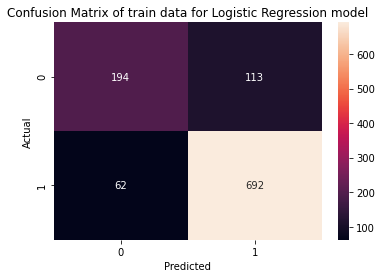

In [162]:
sns.heatmap(confusion_matrix(Y_train,predict_logi_train),annot=True,fmt='g')
plt.title('Confusion Matrix of train data for Logistic Regression model')
plt.xlabel('Predicted')
plt.ylabel('Actual')


The AUC score on the train data is  0.89


Text(0, 0.5, 'True Positive Rate')

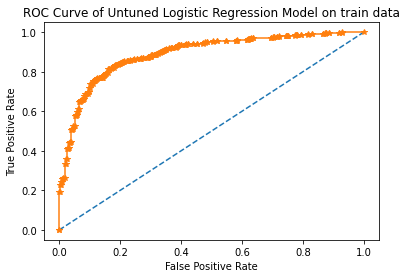

In [163]:
probs_logi_train=model.predict_proba(X_train_scaled)
probs_logi_train=probs_logi_train[:,-1]
AUC_logi_train=roc_auc_score(Y_train,probs_logi_train)
print('The AUC score on the train data is ',round(AUC_logi_train,2))
logi_train_tpr,logi_train_fpr,thresholds=roc_curve(Y_train,probs_logi_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(logi_train_tpr,logi_train_fpr,marker='*')
plt.title('ROC Curve of Untuned Logistic Regression Model on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 15.0, 'Predicted')

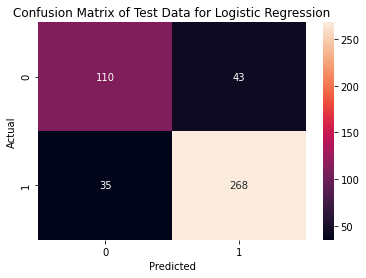

In [164]:
sns.heatmap(confusion_matrix(Y_test,predict_logi_test),annot=True,fmt='g')
plt.title('Confusion Matrix of Test Data for Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')


The AUC score on the train data is  0.88


Text(0, 0.5, 'True Positive Rate')

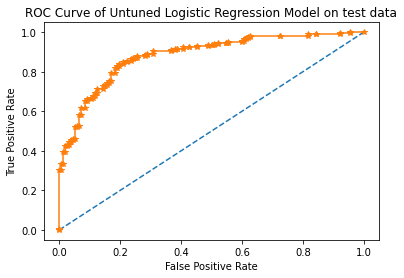

In [165]:
probs_logi_test=model.predict_proba(X_test_scaled)
probs_logi_test=probs_logi_test[:,-1]
AUC_logi_test=roc_auc_score(Y_test,probs_logi_test)
print('The AUC score on the train data is ',round(AUC_logi_test,2))
logi_test_tpr,logi_test_fpr,thresholds=roc_curve(Y_test,probs_logi_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(logi_test_tpr,logi_test_fpr,marker='*')
plt.title('ROC Curve of Untuned Logistic Regression Model on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Logistic R w Gridsearch

In [166]:
from sklearn.model_selection import GridSearchCV
param_grid={'penalty':['l2','l1','elasticnet','none'],
      'solver':['newton-cg','sag','lbfgs','liblinear','sag','saga'],
           'C':[2,3,4,5],
           'random_state':[1,2,3,4,5]}


In [167]:
lr_gs=LogisticRegression(max_iter=1000,n_jobs=2)

In [168]:
lr_grid=GridSearchCV(estimator=lr_gs,param_grid=param_grid,cv=3,n_jobs=3,scoring='f1')

In [169]:
lr_grid.fit(X_train_scaled,Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, n_jobs=2),
             n_jobs=3,
             param_grid={'C': [2, 3, 4, 5],
                         'penalty': ['l2', 'l1', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 4, 5],
                         'solver': ['newton-cg', 'sag', 'lbfgs', 'liblinear',
                                    'sag', 'saga']},
             scoring='f1')

In [170]:
lr_grid.best_params_

{'C': 3, 'penalty': 'l1', 'random_state': 1, 'solver': 'saga'}

In [171]:
lr_best=lr_grid.best_estimator_

In [172]:
lrgs_predtrain=lr_best.predict(X_train_scaled)
lrgs_predtest=lr_best.predict(X_test_scaled)

lrgs_acc_train=accuracy_score(Y_train,lrgs_predtrain)
lrgs_acc_test=accuracy_score(Y_test,lrgs_predtest)

print(' The Accuracy Score on train data is ',round(lrgs_acc_train*100,2),'%')
print(' The Accuracy Score on test data is ',round(lrgs_acc_test*100,2),'%')

 The Accuracy Score on train data is  83.41 %
 The Accuracy Score on test data is  82.89 %


In [173]:
recall_train_loggs=recall_score(Y_train,lrgs_predtrain)
recall_test_loggs=recall_score(Y_test,lrgs_predtest)
precision_train_loggs=precision_score(Y_train,lrgs_predtrain)
precision_test_loggs=precision_score(Y_test,lrgs_predtest)
f1_train_loggs=f1_score(Y_train,lrgs_predtrain)
f1_test_loggs=f1_score(Y_test,lrgs_predtest)

Text(33.0, 0.5, 'Actual')

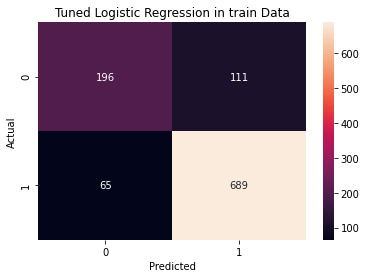

In [174]:
sns.heatmap(confusion_matrix(Y_train,lrgs_predtrain),annot=True,fmt='g')
plt.title('Tuned Logistic Regression in train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Text(33.0, 0.5, 'Actual')

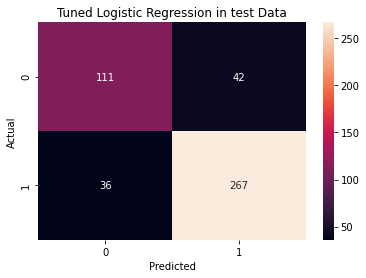

In [175]:
sns.heatmap(confusion_matrix(Y_test,lrgs_predtest),annot=True,fmt='g')
plt.title('Tuned Logistic Regression in test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [176]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,lrgs_predtrain))
print('Classification report in test set')
print('--------------------------------------------')
print(classification_report(Y_test,lrgs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification report in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



The AUC score on the train data is  0.89


Text(0.5, 0, 'False Positive Rate')

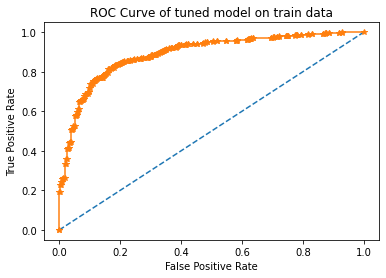

In [177]:
probs_lrgs_train=lr_best.predict_proba(X_train_scaled)
probs_lrgs_train=probs_lrgs_train[:,-1]
AUC_loggs_train=roc_auc_score(Y_train,probs_lrgs_train)
print('The AUC score on the train data is ',round(AUC_loggs_train,3))
loggs_train_tpr,loggs_train_fpr,log_gs_thresholds=roc_curve(Y_train,probs_lrgs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(logi_train_tpr,logi_train_fpr,marker='*')
plt.title('ROC Curve of tuned model on train data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The AUC score on the train data is  0.883


Text(0.5, 0, 'False Positive Rate')

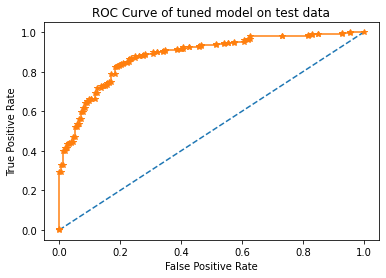

In [178]:
probs_lrgs_test=lr_best.predict_proba(X_test_scaled)
probs_lrgs_test=probs_lrgs_test[:,-1]
AUC_loggs_test=roc_auc_score(Y_test,probs_lrgs_test)
print('The AUC score on the train data is ',round(AUC_loggs_test,3))
logi_test_tpr,logi_test_fpr,gs_thresholds=roc_curve(Y_test,probs_lrgs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(logi_test_tpr,logi_test_fpr,marker='*')
plt.title('ROC Curve of tuned model on test data')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# LDA W/O Tuning

In [179]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
model_lda=lda.fit(X_train,Y_train)
lda_predtrain=model_lda.predict(X_train)
lda_predtest=model_lda.predict(X_test)
model_lda

LinearDiscriminantAnalysis()

In [180]:
lda_acc_train=accuracy_score(Y_train,lda_predtrain)
lda_acc_test=accuracy_score(Y_test,lda_predtest)

print('The accuracy scores of the train and test data is {} % and {} %'.format((round(lda_acc_train*100,2)),(round(lda_acc_test*100,2))))

The accuracy scores of the train and test data is 83.41 % and 83.11 %


In [181]:
recall_train_lda=recall_score(Y_train,lda_predtrain)
recall_test_lda=recall_score(Y_test,lda_predtest)
precision_train_lda=precision_score(Y_train,lda_predtrain)
precision_test_lda=precision_score(Y_test,lda_predtest)
f1_train_lda=f1_score(Y_train,lda_predtrain)
f1_test_lda=f1_score(Y_test,lda_predtest)

In [182]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,lda_predtrain))
print('Classification report of test set')
print('--------------------------------------------')
print(classification_report(Y_test,lda_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification report of test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Text(33.0, 0.5, 'Actual')

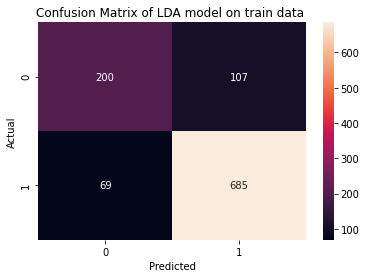

In [183]:
sns.heatmap(confusion_matrix(Y_train,lda_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of LDA model on train data ')
plt.xlabel('Predicted')
plt.ylabel('Actual')


Text(33.0, 0.5, 'Actual')

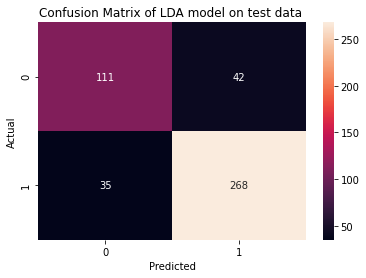

In [184]:
sns.heatmap(confusion_matrix(Y_test,lda_predtest),annot=True,fmt='g')
plt.title('Confusion Matrix of LDA model on test data ')
plt.xlabel('Predicted')
plt.ylabel('Actual')


The AUC score on the train data is  0.89


Text(0.5, 1.0, 'ROC curve of LDA model on train data')

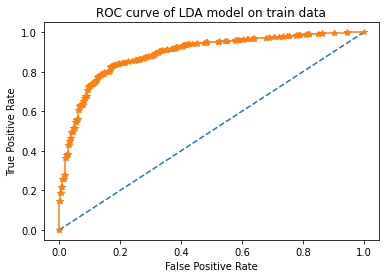

In [185]:
probs_lda_train=lda.predict_proba(X_train)
probs_lda_train=probs_lda_train[:,-1]
AUC_lda_train=roc_auc_score(Y_train,probs_lda_train)
print('The AUC score on the train data is ',round(AUC_lda_train,2))
lda_train_tpr,lda_train_fpr,lda_thresholds=roc_curve(Y_train,probs_lda_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_train_tpr,lda_train_fpr,marker='*')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve of LDA model on train data")

The AUC score on the test data is  0.89


Text(0.5, 1.0, 'ROC curve of LDA model on test data')

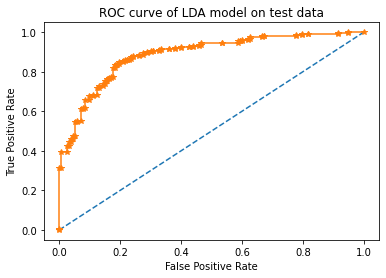

In [186]:
probs_lda_test=lda.predict_proba(X_test)
probs_lda_test=probs_lda_test[:,-1]
AUC_lda_test=roc_auc_score(Y_test,probs_lda_test)
print('The AUC score on the test data is ',round(AUC_lda_test,2))
lda_train_tpr,lda_train_fpr,lda_thresholds=roc_curve(Y_test,probs_lda_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(lda_train_tpr,lda_train_fpr,marker='*')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve of LDA model on test data")


# LDA W Tuning

In [187]:
lda_grid={'solver': ['svd', 'lsqr', 'eigen'],
      'shrinkage': ['auto'],
      'store_covariance': ['false'],
      'n_components' : [1,2,3,4,5],
      'tol': [0.0001],    
         }

elec_grid_lda = LinearDiscriminantAnalysis()

LDA_model = GridSearchCV(estimator = elec_grid_lda, param_grid = lda_grid, cv = 3)

In [188]:
LDA_model.fit(X_train,Y_train)

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\discriminant_analysis.py", line 455, in fit
    raise ValueError(
ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceba

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'n_components': [1, 2, 3, 4, 5], 'shrinkage': ['auto'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'store_covariance': ['false'], 'tol': [0.0001]})

In [189]:
lda_best=LDA_model.best_estimator_

In [190]:
ldags_predtrain=lda_best.predict(X_train)
ldags_predtest=lda_best.predict(X_test)

In [191]:
acc_ldags_train=accuracy_score(Y_train,ldags_predtrain)
acc_ldags_test=accuracy_score(Y_test,ldags_predtest)
print('The accuracy score of train and test data are {} %and {}% '.format(acc_ldags_train*100,acc_ldags_test*100))

The accuracy score of train and test data are 83.22337417530632 %and 83.33333333333334% 


In [192]:
recall_train_ldags=recall_score(Y_train,ldags_predtrain)
recall_test_ldags=recall_score(Y_test,ldags_predtest)
precision_train_ldags=precision_score(Y_train,ldags_predtrain)
precision_test_ldags=precision_score(Y_test,ldags_predtest)
f1_train_ldags=f1_score(Y_train,ldags_predtrain)
f1_test_ldags=f1_score(Y_test,ldags_predtest)

Text(33.0, 0.5, 'Actual')

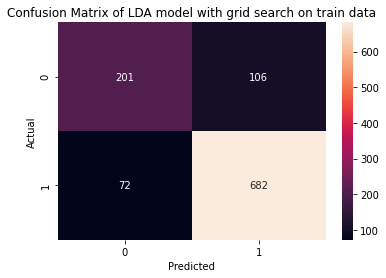

In [193]:
sns.heatmap(confusion_matrix(Y_train,ldags_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of LDA model with grid search on train data')
plt.xlabel("Predicted")
plt.ylabel('Actual')

In [194]:
print('Classification report on train data')
print('--------------------------------------')
print(classification_report(Y_train,ldags_predtrain))

print('Classification report on test data')
print('--------------------------------------')
print(classification_report(Y_test,ldags_predtest))

Classification report on train data
--------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.87      0.90      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

Classification report on test data
--------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.83       456
   macro avg       0.81      0.81      0.81       456
weighted avg       0.83      0.83      0.83       456



Text(33.0, 0.5, 'Actual')

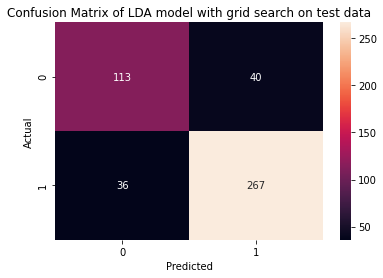

In [195]:
sns.heatmap(confusion_matrix(Y_test,ldags_predtest),annot=True,fmt='g')
plt.title('Confusion Matrix of LDA model with grid search on test data')
plt.xlabel("Predicted")
plt.ylabel('Actual')

The AUC score on the train data is  0.89


Text(0, 0.5, 'True Positive Rate')

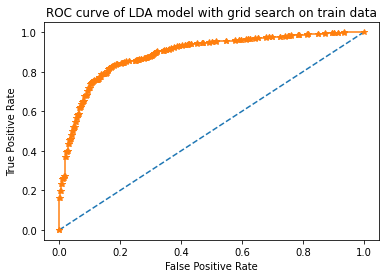

In [196]:
probs_ldags_train=lda_best.predict_proba(X_train)
probs_ldags_train=probs_ldags_train[:,-1]
AUC_ldags_train=roc_auc_score(Y_train,probs_ldags_train)
print('The AUC score on the train data is ',round(AUC_ldags_train,3))
ldags_train_tpr,ldags_train_fpr,ldags_thresholds=roc_curve(Y_train,probs_ldags_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ldags_train_tpr,ldags_train_fpr,marker='*')
plt.title('ROC curve of LDA model with grid search on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.89


Text(0, 0.5, 'True Positive Rate')

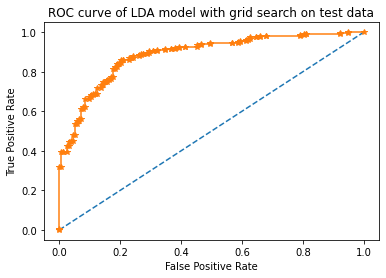

In [197]:
probs_ldags_test=lda_best.predict_proba(X_test)
probs_ldags_test=probs_ldags_test[:,-1]
AUC_ldags_test=roc_auc_score(Y_test,probs_ldags_test)
print('The AUC score on the train data is ',round(AUC_ldags_test,2))
ldags_test_tpr,ldags_test_fpr,ldags_thresholds=roc_curve(Y_test,probs_ldags_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(ldags_test_tpr,ldags_test_fpr,marker='*')
plt.title('ROC curve of LDA model with grid search on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Naive Bayes w/o tuning

In [198]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [199]:
nb=GaussianNB()
model_nb=nb.fit(X_train,Y_train)
nb_predtrain=model_nb.predict(X_train)
nb_predtest=model_nb.predict(X_test)

In [200]:
acc_model_nb_train=accuracy_score(Y_train,nb_predtrain)
acc_model_nb_test=accuracy_score(Y_test,nb_predtest)

In [201]:
print('The accuracy scores of the train and test data is {} % and {} %'.format((round(acc_model_nb_train*100,2)),(round(acc_model_nb_test*100,2))))

The accuracy scores of the train and test data is 83.41 % and 82.24 %


In [202]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,nb_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,nb_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [203]:
recall_train_nb=recall_score(Y_train,nb_predtrain)
recall_test_nb=recall_score(Y_test,nb_predtest)
precision_train_nb=precision_score(Y_train,nb_predtrain)
precision_test_nb=precision_score(Y_test,nb_predtest)
f1_train_nb=f1_score(Y_train,nb_predtrain)
f1_test_nb=f1_score(Y_test,nb_predtest)

Text(0.5, 15.0, 'Predicted')

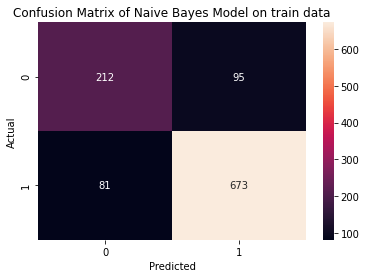

In [204]:
sns.heatmap(confusion_matrix(Y_train,nb_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of Naive Bayes Model on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

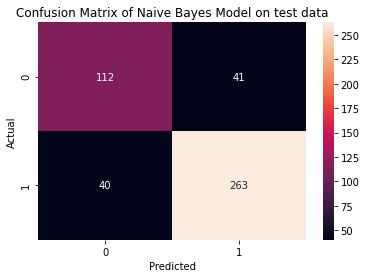

In [205]:
sns.heatmap(confusion_matrix(Y_test,nb_predtest),annot=True,fmt='g')
plt.title('Confusion Matrix of Naive Bayes Model on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.889


Text(0, 0.5, 'True Positive Rate')

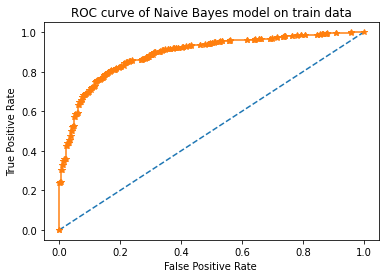

In [206]:
probs_nb_train=nb.predict_proba(X_train)
probs_nb_train=probs_nb_train[:,-1]
AUC_nb_train=roc_auc_score(Y_train,probs_nb_train)
print('The AUC score on the train data is ',round(AUC_nb_train,3))
nb_train_tpr,nb_train_fpr,nb_thresholds=roc_curve(Y_train,probs_nb_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_train_tpr,nb_train_fpr,marker='*')
plt.title('ROC curve of Naive Bayes model on train data')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

The AUC score on the test data is  0.876


Text(0, 0.5, 'True Positive Rate')

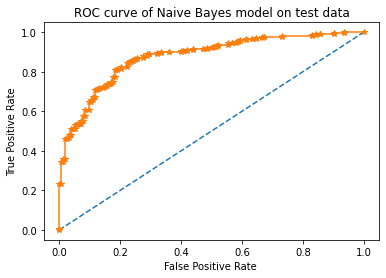

In [207]:
probs_nb_test=nb.predict_proba(X_test)
probs_nb_test=probs_nb_test[:,-1]
AUC_nb_test=roc_auc_score(Y_test,probs_nb_test)
print('The AUC score on the test data is ',round(AUC_nb_test,3))
nb_test_tpr,nb_test_fpr,nb_thresholds=roc_curve(Y_test,probs_nb_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nb_test_tpr,nb_test_fpr,marker='*')
plt.title('ROC curve of Naive Bayes model on test data')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

# Naive Bayes w GS

In [208]:
parameters = {
    'priors': [None],
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001]
}
nb=GaussianNB()
nbgs=GridSearchCV(estimator=nb,param_grid=parameters,cv=3)
nbgs.fit(X_train,Y_train)
nb_best=nbgs.best_estimator_
nbgs_predtrain=nb_best.predict(X_train)
nbgs_predtest=nb_best.predict(X_test)

In [209]:
nbgs.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'priors': [None],
                         'var_smoothing': [1e-08, 1e-09, 1e-08]})

In [210]:
nbgs_acc_train=accuracy_score(Y_train,nbgs_predtrain)
nbgs_acc_test=accuracy_score(Y_test,nbgs_predtest)
print('The accuracy score of train and test data is {}% and {}%'.format(nbgs_acc_train*100,nbgs_acc_test*100))

The accuracy score of train and test data is 83.41187558906692% and 82.23684210526315%


In [211]:
recall_train_nbgs=recall_score(Y_train,nbgs_predtrain)
recall_test_nbgs=recall_score(Y_test,nbgs_predtest)
precision_train_nbgs=precision_score(Y_train,nbgs_predtrain)
precision_test_nbgs=precision_score(Y_test,nbgs_predtest)
f1_train_nbgs=f1_score(Y_train,nbgs_predtrain)
f1_test_nbgs=f1_score(Y_test,nbgs_predtest)

In [212]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,nbgs_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,nbgs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 15.0, 'Predicted')

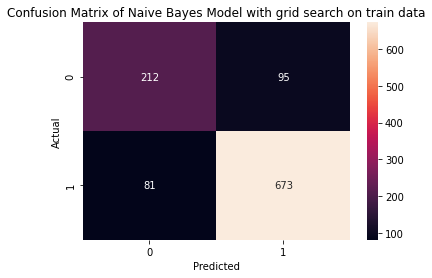

In [213]:
sns.heatmap(confusion_matrix(Y_train,nbgs_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of Naive Bayes Model with grid search on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

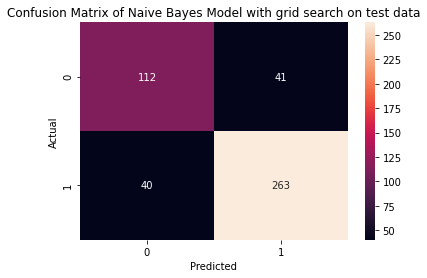

In [214]:
sns.heatmap(confusion_matrix(Y_test,nbgs_predtest),annot=True,fmt='g')
plt.title('Confusion Matrix of Naive Bayes Model with grid search on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.889


Text(0, 0.5, 'True Positive Rate')

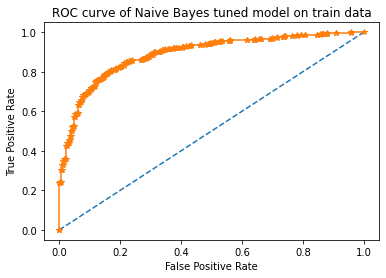

In [215]:
probs_nbgs_train=nb_best.predict_proba(X_train)
probs_nbgs_train=probs_nbgs_train[:,-1]
AUC_nbgs_train=roc_auc_score(Y_train,probs_nbgs_train)
print('The AUC score on the train data is ',round(AUC_nbgs_train,3))
nbgs_train_tpr,nbgs_train_fpr,nbgs_thresholds=roc_curve(Y_train,probs_nbgs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nbgs_train_tpr,nbgs_train_fpr,marker='*')
plt.title('ROC curve of Naive Bayes tuned model on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The AUC score on the test data is  0.876


Text(0, 0.5, 'True Positive Rate')

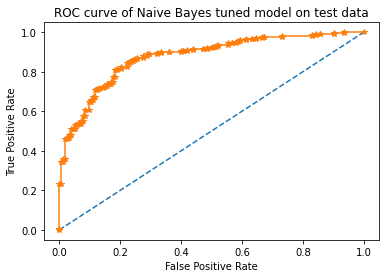

In [216]:
probs_nbgs_test=nb_best.predict_proba(X_test)
probs_nbgs_test=probs_nbgs_test[:,-1]
AUC_nbgs_test=roc_auc_score(Y_test,probs_nbgs_test)
print('The AUC score on the test data is ',round(AUC_nbgs_test,3))
nbgs_test_tpr,nbgs_test_fpr,nbgs_thresholds=roc_curve(Y_test,probs_nbgs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(nbgs_test_tpr,nbgs_test_fpr,marker='*')
plt.title('ROC curve of Naive Bayes tuned model on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# KNN W/O Tuning

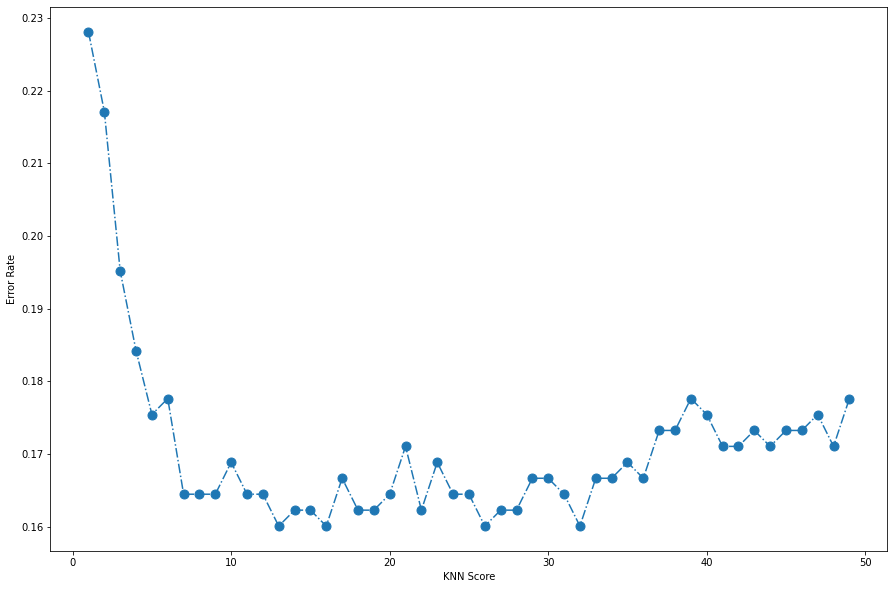

In [217]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
column=[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, Y_train)
    pred = knn.predict(X_test_scaled)
    error_rate.append(np.mean(pred != Y_test))
    column.append(i)

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, linestyle='-.',marker='o', markersize=9)
plt.xlabel('KNN Score')
plt.ylabel('Error Rate')
plt.savefig('Error.png')

In [218]:

Err=pd.DataFrame({'K Value':column,'Error Rate':error_rate})

In [219]:
Err[Err['Error Rate']==Err['Error Rate'].min()]

,K Value,Error Rate
12,13,0.160088
15,16,0.160088
25,26,0.160088
31,32,0.160088


In [220]:
knn=KNeighborsClassifier()
model_knn=knn.fit(X_train_scaled,Y_train)
knn_predtrain=model_knn.predict(X_train_scaled)
knn_predtest=model_knn.predict(X_test_scaled)


In [221]:
acc_train_knn=accuracy_score(Y_train,knn_predtrain)
acc_test_knn=accuracy_score(Y_test,knn_predtest)
print('The accuracy score of the train and test data are {} % and {} % respctively'.format(acc_train_knn*100,acc_test_knn*100))

The accuracy score of the train and test data are 85.76814326107446 % and 82.45614035087719 % respctively


In [222]:
recall_train_knn=recall_score(Y_train,knn_predtrain)
recall_test_knn=recall_score(Y_test,knn_predtest)
precision_train_knn=precision_score(Y_train,knn_predtrain)
precision_test_knn=precision_score(Y_test,knn_predtest)
f1_train_knn=f1_score(Y_train,knn_predtrain)
f1_test_knn=f1_score(Y_test,knn_predtest)

In [223]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,knn_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,knn_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       307
           1       0.89      0.91      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(33.0, 0.5, 'Predicted')

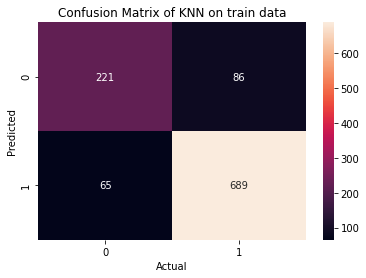

In [224]:
sns.heatmap(confusion_matrix(Y_train,knn_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of KNN on train data')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Text(0.5, 15.0, 'Predicted')

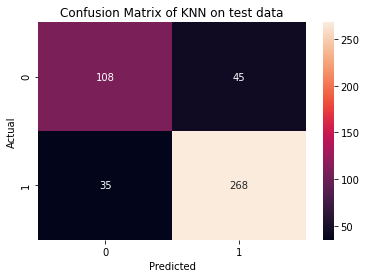

In [225]:
sns.heatmap(confusion_matrix(Y_test,knn_predtest),annot=True,fmt='g')
plt.title('Confusion Matrix of KNN on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.931


Text(0, 0.5, 'True Positive Rate ')

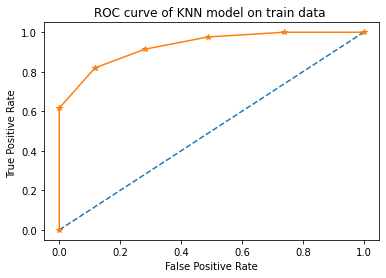

In [226]:
probs_knn_train=knn.predict_proba(X_train_scaled)
probs_knn_train=probs_knn_train[:,-1]
AUC_knn_train=roc_auc_score(Y_train,probs_knn_train)
print('The AUC score on the train data is ',round(AUC_knn_train,3))
knn_train_tpr,knn_train_fpr,knn_thresholds=roc_curve(Y_train,probs_knn_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_train_tpr,knn_train_fpr,marker='*')
plt.title('ROC curve of KNN model on train data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

The AUC score on the test data is  0.87


Text(0, 0.5, 'True Positive Rate ')

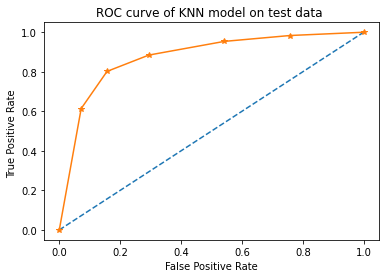

In [227]:
probs_knn_test=knn.predict_proba(X_test_scaled)
probs_knn_test=probs_knn_test[:,-1]
AUC_knn_test=roc_auc_score(Y_test,probs_knn_test)
print('The AUC score on the test data is ',round(AUC_knn_test,2))
knn_test_tpr,knn_test_fpr,knn_thresholds=roc_curve(Y_test,probs_knn_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knn_test_tpr,knn_test_fpr,marker='*')
plt.title('ROC curve of KNN model on test data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')

# KNN W gridsearch

In [228]:
knn_gs=KNeighborsClassifier()

In [229]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_neighbors':[14,15],
    'weights':['uniform','distance'],
    'algorithm':['auto','kd_tree','brute'],
    'leaf_size':[5,10,15,20],
    
}
grid_searchknn=GridSearchCV(estimator=knn_gs,param_grid=param_grid,cv=3)

In [230]:
grid_searchknn.fit(X_train_scaled,Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 20], 'n_neighbors': [14, 15],
                         'weights': ['uniform', 'distance']})

In [231]:
grid_searchknn.best_params_

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 14, 'weights': 'distance'}

In [232]:
grid_best_knn=grid_searchknn.best_estimator_

In [233]:
grid_best_knn

KNeighborsClassifier(leaf_size=5, n_neighbors=14, weights='distance')

In [234]:
knngs_predtrain=grid_best_knn.predict(X_train_scaled)
knngs_predtest=grid_best_knn.predict(X_test_scaled)

In [235]:
acc_knngs_train=accuracy_score(Y_train,knngs_predtrain)
acc_knngs_test=accuracy_score(Y_test,knngs_predtest)
print('The accuracy score of train and test data are {}% and {}% respectively'.format(acc_knngs_train*100,acc_knngs_test*100))

The accuracy score of train and test data are 100.0% and 83.1140350877193% respectively


In [236]:

recall_train_knngs=recall_score(Y_train,knngs_predtrain)
recall_test_knngs=recall_score(Y_test,knngs_predtest)
precision_train_knngs=precision_score(Y_train,knngs_predtrain)
precision_test_knngs=precision_score(Y_test,knngs_predtest)
f1_train_knngs=f1_score(Y_train,knngs_predtrain)
f1_test_knngs=f1_score(Y_test,knngs_predtest)

In [237]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,knngs_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,knngs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



The AUC score on the train data is  1.0


Text(0, 0.5, 'True Positive rate ')

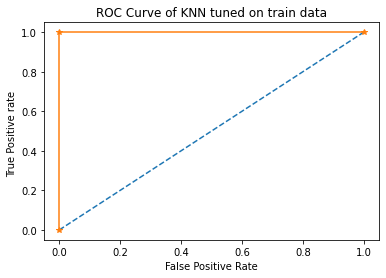

In [238]:
probs_knngs_train=grid_best_knn.predict_proba(X_train_scaled)
probs_knngs_train=probs_knngs_train[:,-1]
AUC_knngs_train=roc_auc_score(Y_train,probs_knngs_train)
print('The AUC score on the train data is ',round(AUC_knngs_train,3))
knngs_train_tpr,knngs_train_fpr,knngs_thresholds=roc_curve(Y_train,probs_knngs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knngs_train_tpr,knngs_train_fpr,marker='*')
plt.title('ROC Curve of KNN tuned on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate ')

The AUC score on the test data is  0.888


Text(0, 0.5, 'True Positive rate ')

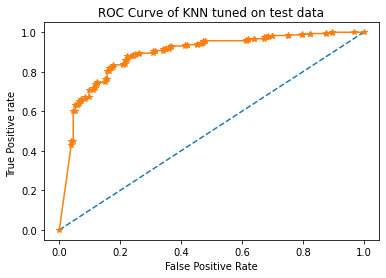

In [239]:
probs_knngs_test=grid_best_knn.predict_proba(X_test_scaled)
probs_knngs_test=probs_knngs_test[:,-1]
AUC_knngs_test=roc_auc_score(Y_test,probs_knngs_test)
print('The AUC score on the test data is ',round(AUC_knngs_test,3))
knngs_test_tpr,knngs_test_fpr,knngs_thresholds=roc_curve(Y_test,probs_knngs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(knngs_test_tpr,knngs_test_fpr,marker='*')
plt.title('ROC Curve of KNN tuned on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate ')

Text(0.5, 15.0, 'Predicted')

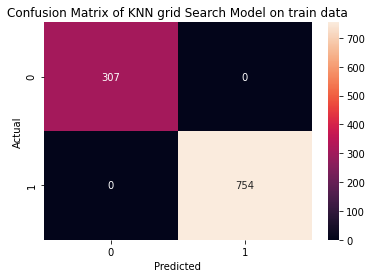

In [240]:
sns.heatmap(confusion_matrix(Y_train,knngs_predtrain),annot=True,fmt='g')
plt.title('Confusion Matrix of KNN grid Search Model on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

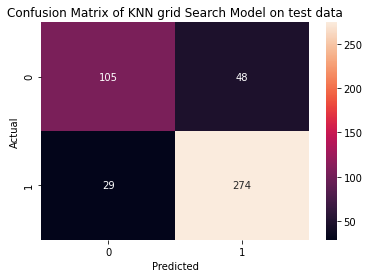

In [241]:
sns.heatmap(confusion_matrix(Y_test,knngs_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of KNN grid Search Model on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# RF- BAGGING

In [242]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(random_state=1)
model_rfcl=rfcl.fit(X_train,Y_train)
pred_train_rfcl=model_rfcl.predict(X_train)
pred_test_rfcl=model_rfcl.predict(X_test)


In [243]:
acc_rfcltrain=accuracy_score(Y_train,pred_train_rfcl)
acc_rfcl_test=accuracy_score(Y_test,pred_test_rfcl)

print('The accuracy score of the train and the test data is {} % and {}%'.format(acc_rfcltrain*100,acc_rfcl_test*100))

The accuracy score of the train and the test data is 100.0 % and 83.1140350877193%


In [244]:
recall_train_rfcl=recall_score(Y_train,pred_train_rfcl)
recall_test_rfcl=recall_score(Y_test,pred_test_rfcl)
precision_train_rfcl=precision_score(Y_train,pred_train_rfcl)
precision_test_rfcl=precision_score(Y_test,pred_test_rfcl)
f1_train_rfcl=f1_score(Y_train,pred_train_rfcl)
f1_test_rfl=f1_score(Y_test,pred_test_rfcl)

In [245]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,pred_train_rfcl))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,pred_test_rfcl))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



The AUC score on the train data is  1.0


Text(0, 0.5, 'True Positive Rate')

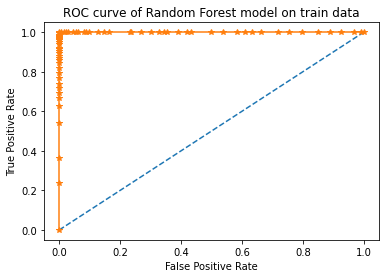

In [246]:
probs_rfcl_train=rfcl.predict_proba(X_train)
probs_rfcl_train=probs_rfcl_train[:,-1]
AUC_rfcl_train=roc_auc_score(Y_train,probs_rfcl_train)
print('The AUC score on the train data is ',round(AUC_rfcl_train,3))
rf_train_tpr,rf_train_fpr,rf_thresholds=roc_curve(Y_train,probs_rfcl_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_tpr,rf_train_fpr,marker='*')
plt.title('ROC curve of Random Forest model on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


The AUC score on the test data is  0.895


Text(0, 0.5, 'True Positive Rate')

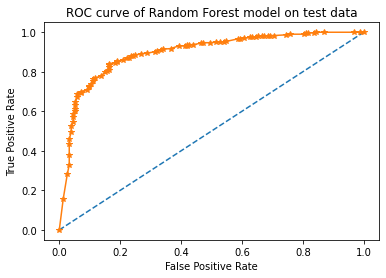

In [257]:
probs_rfcl_test=rfcl.predict_proba(X_test)
probs_rfcl_test=probs_rfcl_test[:,-1]
AUC_rfcl_test=roc_auc_score(Y_test,probs_rfcl_test)
print('The AUC score on the test data is ',round(AUC_rfcl_test,3))
rf_test_tpr,rf_test_fpr,rf_thresholds=roc_curve(Y_test,probs_rfcl_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_test_tpr,rf_test_fpr,marker='*')
plt.title('ROC curve of Random Forest model on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


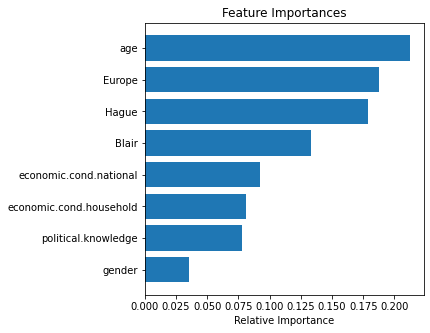

In [248]:
importances =rfcl.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Text(0.5, 15.0, 'Predicted')

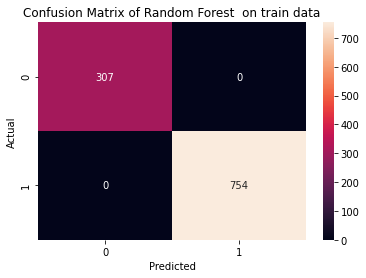

In [249]:
sns.heatmap(confusion_matrix(Y_train,pred_train_rfcl),annot=True,fmt='g')

plt.title('Confusion Matrix of Random Forest  on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

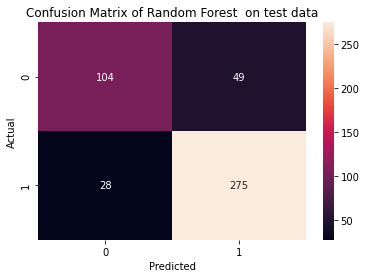

In [250]:
sns.heatmap(confusion_matrix(Y_test,pred_test_rfcl),annot=True,fmt='g')

plt.title('Confusion Matrix of Random Forest  on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# RF w TUNING

In [251]:
rfcl_gs=RandomForestClassifier()
param_grid={
    'max_depth': [3,5,10],
    'max_features': [1,2,3,4,5],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [10,25,50], 
    'n_estimators': [5,10,15,20],
}
rf_gs=GridSearchCV(estimator=rfcl_gs,param_grid=param_grid,cv=3)
rf_gs.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [10, 25, 50],
                         'n_estimators': [5, 10, 15, 20]})

In [252]:
rf_best=rf_gs.best_estimator_
rfgs_predtrain=rf_best.predict(X_train)
rfgs_predtest=rf_best.predict(X_test)
acc_rfgs_train=accuracy_score(Y_train,rfgs_predtrain)
acc_rfgs_test=accuracy_score(Y_test,rfgs_predtest)

print('The accuracy score n the train and the test data is {}% and {}% respectively'.format(acc_rfgs_train*100,acc_rfgs_test*100))


The accuracy score n the train and the test data is 86.05089538171536% and 82.45614035087719% respectively


In [253]:
recall_train_rfgs=recall_score(Y_train,rfgs_predtrain)
recall_test_rfgs=recall_score(Y_test,rfgs_predtest)
precision_train_rfgs=precision_score(Y_train,rfgs_predtrain)
precision_test_rfgs=precision_score(Y_test,rfgs_predtest)
f1_train_rfgs=f1_score(Y_train,rfgs_predtrain)
f1_test_rfgs=f1_score(Y_test,rfgs_predtest)

In [254]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,rfgs_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,rfgs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.70      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.86      0.86      0.86      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 15.0, 'Predicted')

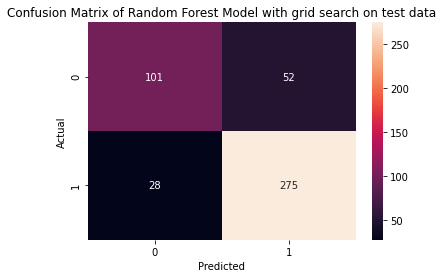

In [255]:
sns.heatmap(confusion_matrix(Y_test,rfgs_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of Random Forest Model with grid search on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

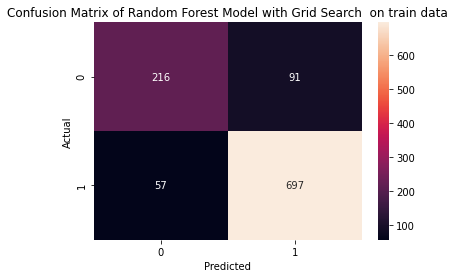

In [256]:
sns.heatmap(confusion_matrix(Y_train,rfgs_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of Random Forest Model with Grid Search  on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.933


Text(0, 0.5, 'True Positive Rate')

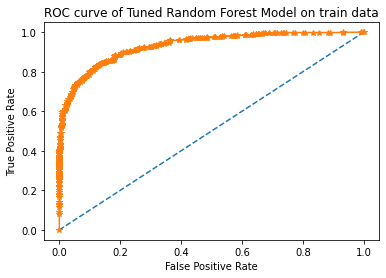

In [258]:
probs_rfgs_train=rf_best.predict_proba(X_train)
probs_rfgs_train=probs_rfgs_train[:,-1]
AUC_rfgs_train=roc_auc_score(Y_train,probs_rfgs_train)
print('The AUC score on the train data is ',round(AUC_rfgs_train,3))
rf_train_tpr,rf_train_fpr,rf_thresholds=roc_curve(Y_train,probs_rfgs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_tpr,rf_train_fpr,marker='*')
plt.title('ROC curve of Tuned Random Forest Model on train data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.89


Text(0, 0.5, 'True Positive Rate')

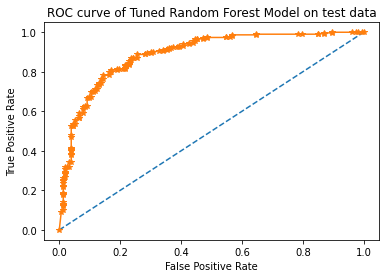

In [259]:
probs_rfgs_test=rf_best.predict_proba(X_test)
probs_rfgs_test=probs_rfgs_test[:,-1]
AUC_rfgs_test=roc_auc_score(Y_test,probs_rfgs_test)
print('The AUC score on the train data is ',round(AUC_rfgs_test,3))
rf_test_tpr,rf_test_fpr,rf_thresholds=roc_curve(Y_test,probs_rfgs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_test_tpr,rf_test_fpr,marker='*')
plt.title('ROC curve of Tuned Random Forest Model on test data')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

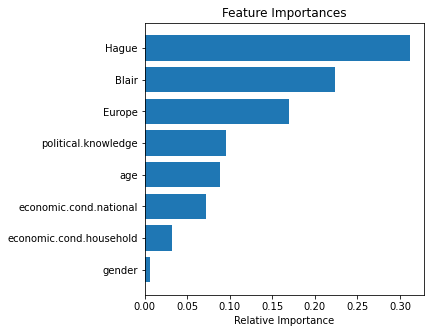

In [260]:
importances =rf_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ADA BOOST AND GRADIENT BOOST

In [261]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [262]:
ada=AdaBoostClassifier(random_state=1)
model_ada=ada.fit(X_train,Y_train)

In [263]:
ada_predtrain=model_ada.predict(X_train)
ada_predtest=model_ada.predict(X_test)

In [264]:
acc_ada_train=accuracy_score(Y_train,ada_predtrain)
acc_ada_test=accuracy_score(Y_test,ada_predtest)

print('The accuracy score on the train data is ',acc_ada_train*100,'%')
print('The accuracy score on the test data is ',acc_ada_test*100,'%')

The accuracy score on the train data is  84.63713477851084 %
The accuracy score on the test data is  81.35964912280701 %


In [265]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,ada_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,ada_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       307
           1       0.88      0.91      0.89       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.85      0.84      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       153
           1       0.85      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [266]:
recall_train_ada=recall_score(Y_train,ada_predtrain)
recall_test_ada=recall_score(Y_test,ada_predtest)
precision_train_ada=precision_score(Y_train,ada_predtrain)
precision_test_ada=precision_score(Y_test,ada_predtest)
f1_train_ada=f1_score(Y_train,ada_predtrain)
f1_test_ada=f1_score(Y_test,ada_predtest)

The AUC score on the train data is  0.912


Text(0, 0.5, 'True Positive Rate')

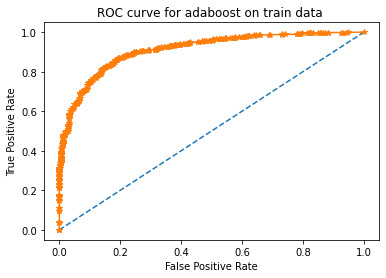

In [267]:
probs_ada_train=ada.predict_proba(X_train)
probs_ada_train=probs_ada_train[:,-1]
AUC_ada_train=roc_auc_score(Y_train,probs_ada_train)
print('The AUC score on the train data is ',round(AUC_ada_train,3))
rf_train_tpr,rf_train_fpr,rf_thresholds=roc_curve(Y_train,probs_ada_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_tpr,rf_train_fpr,marker='*')
plt.title('ROC curve for adaboost on train data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.881


Text(0, 0.5, 'True Positive Rate')

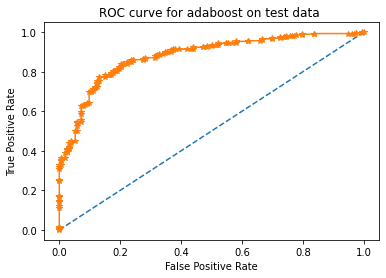

In [268]:
probs_ada_test=ada.predict_proba(X_test)
probs_ada_test=probs_ada_test[:,-1]
AUC_ada_test=roc_auc_score(Y_test,probs_ada_test)
print('The AUC score on the train data is ',round(AUC_ada_test,3))
rf_train_tpr,rf_train_fpr,rf_thresholds=roc_curve(Y_test,probs_ada_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(rf_train_tpr,rf_train_fpr,marker='*')
plt.title('ROC curve for adaboost on test data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0.5, 15.0, 'Predicted')

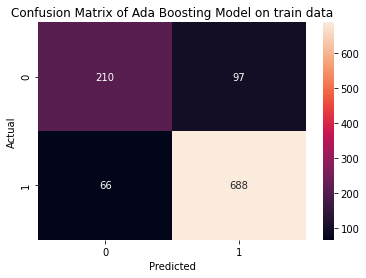

In [269]:
sns.heatmap(confusion_matrix(Y_train,ada_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of Ada Boosting Model on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

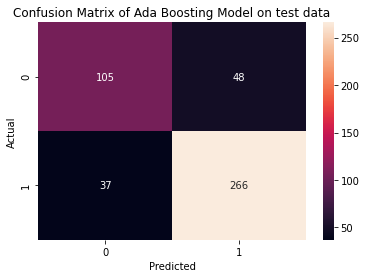

In [270]:
sns.heatmap(confusion_matrix(Y_test,ada_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of Ada Boosting Model on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

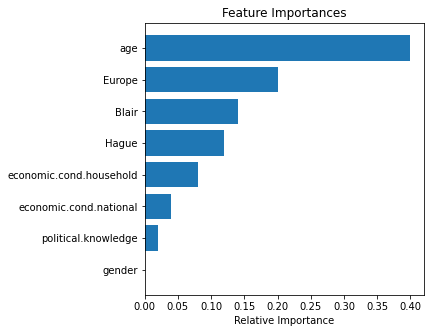

In [271]:
importances =ada.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# GB without tuning

In [272]:
gb=GradientBoostingClassifier(random_state=1)

In [273]:
model_gb=gb.fit(X_train,Y_train)

In [274]:
gb_predtrain=model_gb.predict(X_train)
gb_predtest=model_gb.predict(X_test)

In [322]:
acc_gb_train=accuracy_score(Y_train,gb_predtrain)
acc_gb_test=accuracy_score(Y_test,gb_predtest)

print("The accuracy of the training set is",acc_gb_train*100,"%")
print("The accuracy of the testing set is" ,acc_gb_test*100,"%")

The accuracy of the training set is 89.25541941564562 %
The accuracy of the testing set is 83.55263157894737 %


In [276]:
recall_train_gb=recall_score(Y_train,gb_predtrain)
recall_test_gb=recall_score(Y_test,gb_predtest)
precision_train_gb=precision_score(Y_train,gb_predtrain)
precision_test_gb=precision_score(Y_test,gb_predtest)
f1_train_gb=f1_score(Y_train,gb_predtrain)
f1_test_gb=f1_score(Y_test,gb_predtest)

Text(0.5, 15.0, 'Predicted')

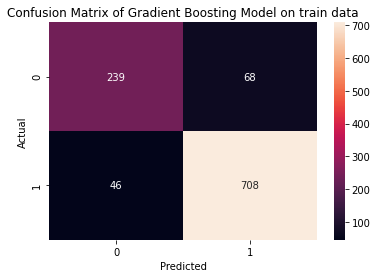

In [277]:
sns.heatmap(confusion_matrix(Y_train,gb_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of Gradient Boosting Model on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

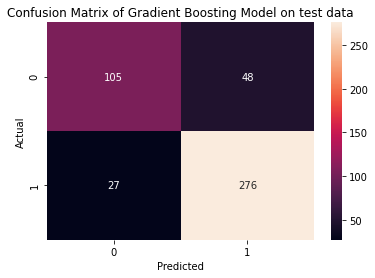

In [278]:
sns.heatmap(confusion_matrix(Y_test,gb_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of Gradient Boosting Model on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.899


Text(0, 0.5, 'True Positive Rate')

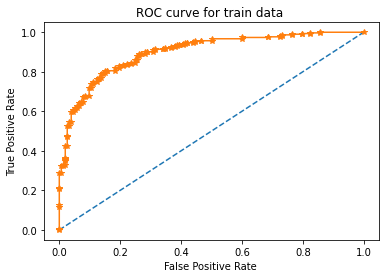

In [279]:
probs_gb_test=gb.predict_proba(X_test)
probs_gb_test=probs_gb_test[:,-1]
AUC_gb_test=roc_auc_score(Y_test,probs_gb_test)
print('The AUC score on the train data is ',round(AUC_gb_test
                                                  ,3))
gb_test_tpr,gb_test_fpr,gb_thresholds=roc_curve(Y_test,probs_gb_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gb_test_tpr,gb_test_fpr,marker='*')
plt.title('ROC curve for train data ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.951


Text(0, 0.5, 'True Positive Rate')

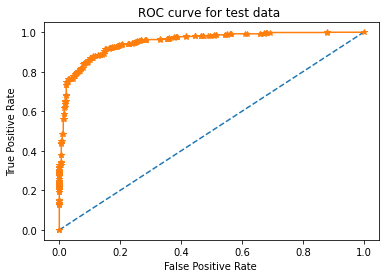

In [280]:
probs_gb_train=gb.predict_proba(X_train)
probs_gb_train=probs_gb_train[:,-1]
AUC_gb_train=roc_auc_score(Y_train,probs_gb_train)
print('The AUC score on the train data is ',round(AUC_gb_train,3))
gb_train_tpr,gb_train_fpr,gb_thresholds=roc_curve(Y_train,probs_gb_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gb_train_tpr,gb_train_fpr,marker='*')
plt.title('ROC curve for test data ')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

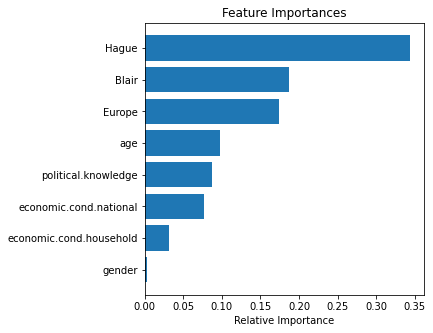

In [289]:
importances=gb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [282]:
print('Classificarion report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,gb_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,gb_predtest))

Classificarion report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



# XGBoost without tuning

In [283]:
from xgboost import XGBClassifier

In [284]:
xgb=XGBClassifier(random_state=1)
model_xgb=xgb.fit(X_train,Y_train)

C:\Users\Kinshuk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [285]:
xgb_predtrain=model_xgb.predict(X_train)
xgb_predtest=model_xgb.predict(X_test)

In [286]:
acc_xgb_train=accuracy_score(Y_train,xgb_predtrain)
acc_xgb_test=accuracy_score(Y_test,xgb_predtest)

print('The Accuracy score of train and test data are {}% and {}% respectivly'.format(acc_xgb_train*100,acc_xgb_test*100))

The Accuracy score of train and test data are 99.8114985862394% and 82.45614035087719% respectivly


In [336]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,xgb_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,xgb_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.73      0.74       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 15.0, 'Predicted')

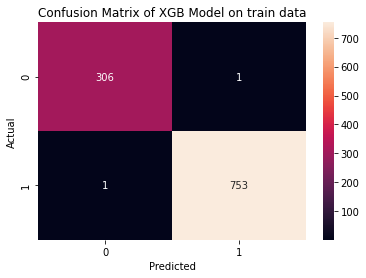

In [288]:
sns.heatmap(confusion_matrix(Y_train,xgb_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of XGB Model on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

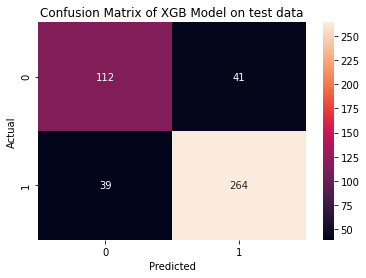

In [290]:
sns.heatmap(confusion_matrix(Y_test,xgb_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of XGB Model on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [291]:
recall_train_xgb=recall_score(Y_train,xgb_predtrain)
recall_test_xgb=recall_score(Y_test,xgb_predtest)
precision_train_xgb=precision_score(Y_train,xgb_predtrain)
precision_test_xgb=precision_score(Y_test,xgb_predtest)
f1_train_xgb=f1_score(Y_train,xgb_predtrain)
f1_test_xgb=f1_score(Y_test,xgb_predtest)

The AUC score on the train data is  1.0


Text(0, 0.5, 'True Positive Rate')

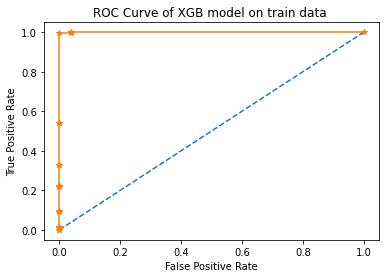

In [292]:
probs_xgb_train=xgb.predict_proba(X_train)
probs_xgb_train=probs_xgb_train[:,-1]
AUC_xgb_train=roc_auc_score(Y_train,probs_xgb_train)
print('The AUC score on the train data is ',round(AUC_xgb_train,3))
xgb_train_tpr,xgb_train_fpr,gb_thresholds=roc_curve(Y_train,probs_xgb_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xgb_train_tpr,xgb_train_fpr,marker='*')
plt.title('ROC Curve of XGB model on train data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.887


Text(0, 0.5, 'True Positive Rate')

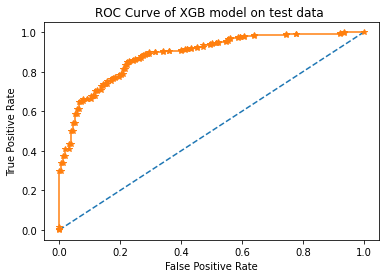

In [293]:
probs_xgb_test=xgb.predict_proba(X_test)
probs_xgb_test=probs_xgb_test[:,-1]
AUC_xgb_test=roc_auc_score(Y_test,probs_xgb_test)
print('The AUC score on the train data is ',round(AUC_xgb_test,3))
xgb_test_tpr,xgb_test_fpr,xgb_thresholds=roc_curve(Y_test,probs_xgb_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xgb_test_tpr,xgb_test_fpr,marker='*')
plt.title('ROC Curve of XGB model on test data ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

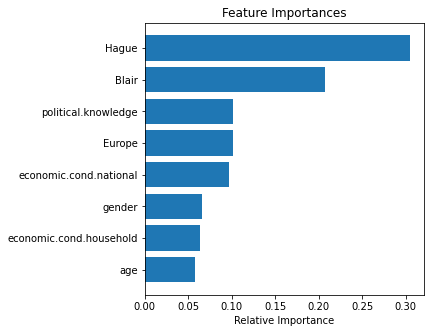

In [294]:
importances=xgb.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# XGBoost with Tuning

In [295]:
param_grid = {
    "n_estimators":[10,15,20,25],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

xg_gridsearch=GridSearchCV(estimator=XGBClassifier(),param_grid=param_grid,cv=3)
xg_gridsearch.fit(X_train,Y_train)


C:\Users\Kinshuk\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:18:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:18:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [296]:
xg_best=xg_gridsearch.best_estimator_

In [297]:
xggs_predtrain=xg_best.predict(X_train)
xggs_predtest=xg_best.predict(X_test)

In [298]:
acc_xggs_train=accuracy_score(Y_train,xggs_predtrain)
acc_xggs_test=accuracy_score(Y_test,xggs_predtest)
print("The accuracy score of train and test data is {}% and {}%".format(acc_xggs_train*100,acc_xggs_test*100))

The accuracy score of train and test data is 87.37040527803958% and 83.33333333333334%


In [299]:
recall_train_xggs=recall_score(Y_train,xggs_predtrain)
recall_test_xggs=recall_score(Y_test,xggs_predtest)
precision_train_xggs=precision_score(Y_train,xggs_predtrain)
precision_test_xggs=precision_score(Y_test,xggs_predtest)
f1_train_xggs=f1_score(Y_train,xggs_predtrain)
f1_test_xggs=f1_score(Y_test,xggs_predtest)

In [337]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,xggs_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,xggs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       307
           1       0.90      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       153
           1       0.86      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 15.0, 'Predicted')

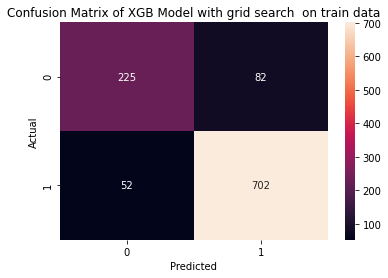

In [301]:
sns.heatmap(confusion_matrix(Y_train,xggs_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of XGB Model with grid search  on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

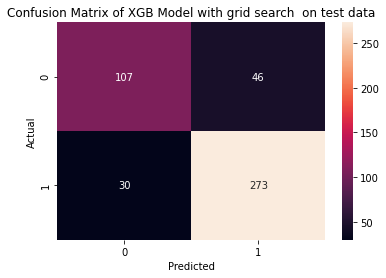

In [302]:
sns.heatmap(confusion_matrix(Y_test,xggs_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of XGB Model with grid search  on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the train data is  0.931


Text(0, 0.5, 'True Positive Rate')

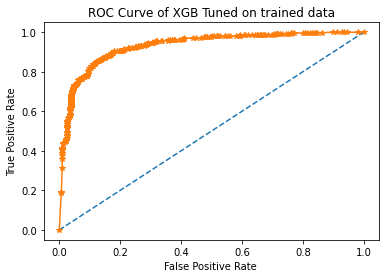

In [303]:
probs_xggs_train=xg_best.predict_proba(X_train)
probs_xggs_train=probs_xggs_train[:,-1]
AUC_xggs_train=roc_auc_score(Y_train,probs_xggs_train)
print('The AUC score on the train data is ',round(AUC_xggs_train,3))
xggs_train_tpr,xggs_train_fpr,xggs_thresholds=roc_curve(Y_train,probs_xggs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xggs_train_tpr,xggs_train_fpr,marker='*')
plt.title('ROC Curve of XGB Tuned on trained data')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

The AUC score on the train data is  0.888


Text(0, 0.5, 'True Positive Rate')

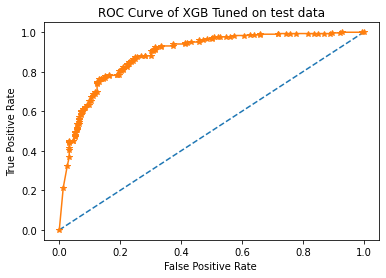

In [304]:
probs_xggs_test=xg_best.predict_proba(X_test)
probs_xggs_test=probs_xggs_test[:,-1]
AUC_xggs_test=roc_auc_score(Y_test,probs_xggs_test)
print('The AUC score on the train data is ',round(AUC_xggs_test,3))
xggs_test_tpr,xggs_test_fpr,xggs_thresholds=roc_curve(Y_test,probs_xggs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xggs_test_tpr,xggs_test_fpr,marker='*')
plt.title('ROC Curve of XGB Tuned on test data')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

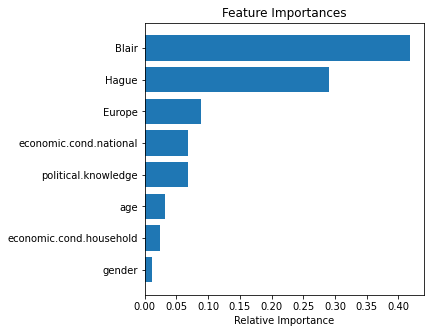

In [306]:
importances=xg_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(5,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# ADA and Gradient boosting with tuning

In [307]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
param_grid={
    'learning_rate':[2,3,4,5,6,7,8,9],
    'n_estimators':[50,60,70,80,90]
}
ada_gs=AdaBoostClassifier(random_state=1)
ada_gsp=GridSearchCV(estimator=ada_gs,param_grid=param_grid,cv=3)
ada_gsp.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1),
             param_grid={'learning_rate': [2, 3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [50, 60, 70, 80, 90]})

In [308]:
ada_gs.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [309]:
adags_best=ada_gsp.best_estimator_

In [310]:
adags_predtrain=adags_best.predict(X_train)
adags_predtest=adags_best.predict(X_test)


In [311]:
acc_adags_train=accuracy_score(Y_train,adags_predtrain)
acc_adags_test=accuracy_score(Y_test,adags_predtest)
print('The accuracy score of the train and test models are {}% and {}% respectively'.format(acc_adags_train*100,acc_adags_test*100))

The accuracy score of the train and test models are 71.06503298774741% and 66.44736842105263% respectively


In [312]:
recall_train_adags=recall_score(Y_train,adags_predtrain)
recall_test_adags=recall_score(Y_test,adags_predtest)
precision_train_adags=precision_score(Y_train,adags_predtrain)
precision_test_adags=precision_score(Y_test,adags_predtest)
f1_train_adags=f1_score(Y_train,adags_predtrain)
f1_test_adags=f1_score(Y_test,adags_predtest)

In [313]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,adags_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,adags_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       307
           1       0.71      1.00      0.83       754

    accuracy                           0.71      1061
   macro avg       0.36      0.50      0.42      1061
weighted avg       0.51      0.71      0.59      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       153
           1       0.66      1.00      0.80       303

    accuracy                           0.66       456
   macro avg       0.33      0.50      0.40       456
weighted avg       0.44      0.66      0.53       456



C:\Users\Kinshuk\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 15.0, 'Predicted')

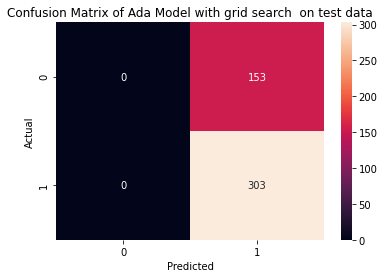

In [314]:
sns.heatmap(confusion_matrix(Y_test,adags_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of Ada Model with grid search  on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

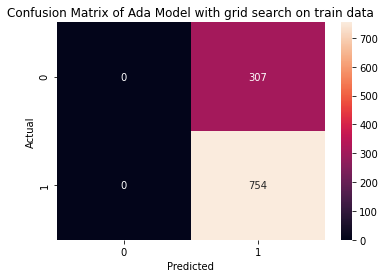

In [319]:
sns.heatmap(confusion_matrix(Y_train,adags_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of Ada Model with grid search on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the test data is  0.5


Text(0, 0.5, 'True Positive Rate')

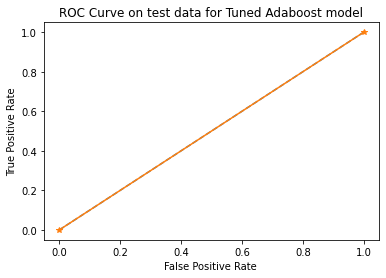

In [316]:
probs_adags_test=adags_best.predict_proba(X_test)
probs_adags_test=probs_adags_test[:,-1]
AUC_adags_test=roc_auc_score(Y_test,probs_adags_test)
print('The AUC score on the test data is ',round(AUC_adags_test,3))
xggs_test_tpr,xggs_test_fpr,xggs_thresholds=roc_curve(Y_test,probs_adags_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xggs_test_tpr,xggs_test_fpr,marker='*')
plt.title('ROC Curve on test data for Tuned Adaboost model')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

The AUC score on the test data is  0.5


Text(0, 0.5, 'True Positive Rate')

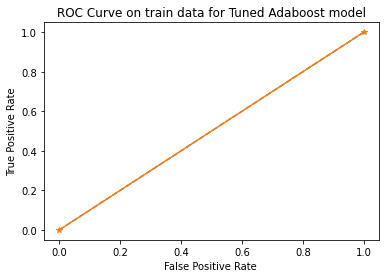

In [320]:
probs_adags_train=adags_best.predict_proba(X_train)
probs_adags_train=probs_adags_train[:,-1]
AUC_adags_train=roc_auc_score(Y_train,probs_adags_train)
print('The AUC score on the test data is ',round(AUC_adags_train,3))
xggs_train_tpr,xggs_train_fpr,xggs_thresholds=roc_curve(Y_train,probs_adags_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(xggs_train_tpr,xggs_train_fpr,marker='*')
plt.title('ROC Curve on train data for Tuned Adaboost model')
plt.xlabel('False Positive Rate ')
plt.ylabel('True Positive Rate')

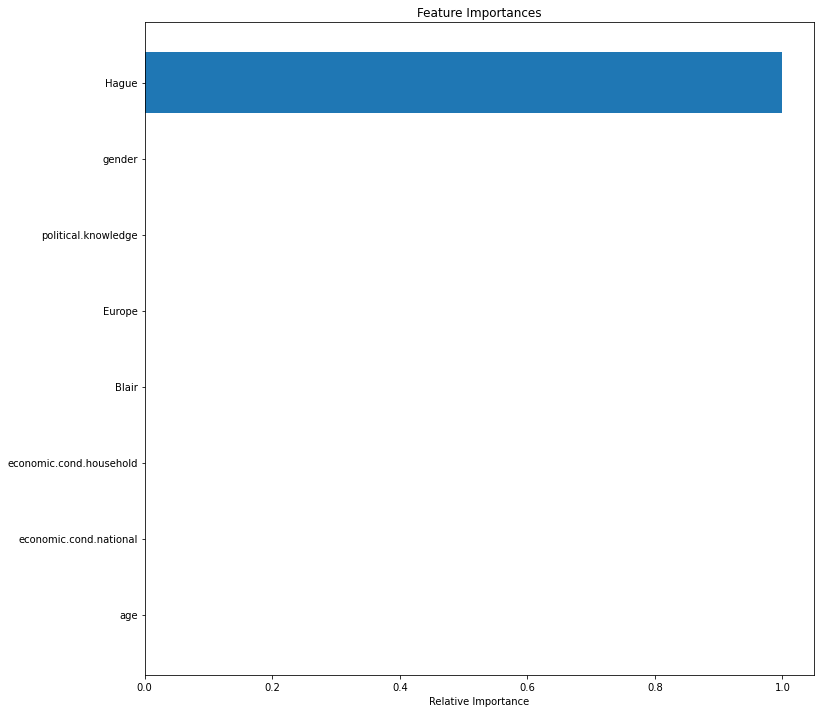

In [318]:
importances=adags_best.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [324]:
###### GRADRIENT BOOSTING W TUNING

In [325]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_tuned = GradientBoostingClassifier(random_state=1)

parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

gbcgs=GridSearchCV(estimator=gbc_tuned,param_grid=parameters,cv=3)
gbcgs.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             param_grid={'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.8, 0.9, 1]})

In [326]:
gbcgs_best=gbcgs.best_estimator_
gbcgs_predtrain=gbcgs_best.predict(X_train)
gbcgs_predtest=gbcgs_best.predict(X_test)

In [327]:
acc_gbcgs_train=accuracy_score(Y_train,gbcgs_predtrain)
acc_gbcgs_test=accuracy_score(Y_test,gbcgs_predtest)

print("The accuracy data on the train and test data is {}% and {}% ".format(acc_gbcgs_train*100,acc_gbcgs_test*100))

The accuracy data on the train and test data is 87.37040527803958% and 83.1140350877193% 


In [328]:
recall_train_gbcgs=recall_score(Y_train,gbcgs_predtrain)
recall_test_gbcgs=recall_score(Y_test,gbcgs_predtest)
precision_train_gbcgs=precision_score(Y_train,gbcgs_predtrain)
precision_test_gbcgs=precision_score(Y_test,gbcgs_predtest)
f1_train_gbcgs=f1_score(Y_train,gbcgs_predtrain)
f1_test_gbcgs=f1_score(Y_test,gbcgs_predtest)

In [329]:
print('Classification report of Train set')
print('-------------------------------------------')
print(classification_report(Y_train,gbcgs_predtrain))
print('Classification in test set')
print('--------------------------------------------')
print(classification_report(Y_test,gbcgs_predtest))

Classification report of Train set
-------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.73      0.77       307
           1       0.89      0.93      0.91       754

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061

Classification in test set
--------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 15.0, 'Predicted')

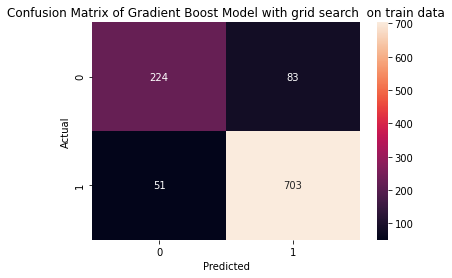

In [330]:
sns.heatmap(confusion_matrix(Y_train,gbcgs_predtrain),annot=True,fmt='g')

plt.title('Confusion Matrix of Gradient Boost Model with grid search  on train data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 15.0, 'Predicted')

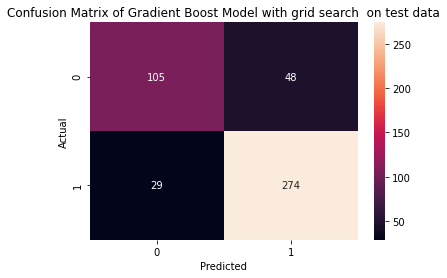

In [331]:
sns.heatmap(confusion_matrix(Y_test,gbcgs_predtest),annot=True,fmt='g')

plt.title('Confusion Matrix of Gradient Boost Model with grid search  on test data')
plt.ylabel('Actual')
plt.xlabel('Predicted')

The AUC score on the test data is  0.894


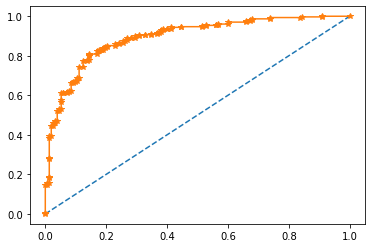

In [332]:
probs_gbcgs_test=gbcgs_best.predict_proba(X_test)
probs_gbcgs_test=probs_gbcgs_test[:,-1]
AUC_gbcgs_test=roc_auc_score(Y_test,probs_gbcgs_test)
print('The AUC score on the test data is ',round(AUC_gbcgs_test,3))
gbcgs_test_tpr,gbcgs_test_fpr,gbcgs_thresholds=roc_curve(Y_test,probs_gbcgs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gbcgs_test_tpr,gbcgs_test_fpr,marker='*')

The AUC score on the train data is  0.934


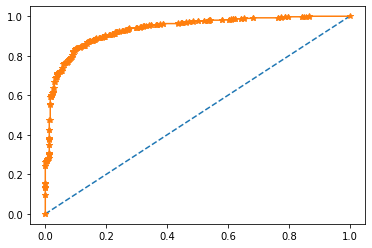

In [333]:
probs_gbcgs_train=gbcgs_best.predict_proba(X_train)
probs_gbcgs_train=probs_gbcgs_train[:,-1]
AUC_gbcgs_train=roc_auc_score(Y_train,probs_gbcgs_train)
print('The AUC score on the train data is ',round(AUC_gbcgs_train,3))
gbcgs_train_tpr,gbcgs_train_fpr,gbcgs_thresholds=roc_curve(Y_train,probs_gbcgs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(gbcgs_train_tpr,gbcgs_train_fpr,marker='*')

In [334]:
Final_overview=pd.DataFrame({'Model':['Logistic Regression without tuning', 'Logistic Regression with tuning','Linear Discriminant Analysis without Tuning','Linear Discriminant Analysis with tuning' ,'Naive Bayes without Tuning','Naive Bayes with tuning','KNN without tuning','KNN with tuning','Random Forest(Bagging) without tuning','Random Forest with tuning','AdaBoost without Tuning','Adaboost with tuning','Gradient Boosting without tuning','Gradient Boosting with Tuning','XGBoost without tuning','XGBoost with tuning']})

In [338]:
accuracy_score_train=[accuracy_score_lr_train,lrgs_acc_train,lda_acc_train,acc_ldags_train,acc_model_nb_train,nbgs_acc_train,acc_train_knn,acc_knngs_train,acc_rfcltrain,acc_rfgs_train,acc_ada_train,acc_adags_train,acc_gb_train,acc_gbcgs_train,acc_xgb_train,acc_xggs_train]

In [339]:
acc_updated=[]
for a in accuracy_score_train:
    a=round((a*100),3)
    acc_updated.append(a)

In [340]:
acc_updated

[83.506,
 83.412,
 83.412,
 83.223,
 83.412,
 83.412,
 85.768,
 100.0,
 100.0,
 86.051,
 84.637,
 71.065,
 89.255,
 87.37,
 99.811,
 87.37]

In [341]:
Final_overview['Accuracy Score on Train Data in % ']=acc_updated

In [342]:
Final_overview

,Model,Accuracy Score on Train Data in %
0,Logistic Regression without tuning,83.506
1,Logistic Regression with tuning,83.412
2,Linear Discriminant Analysis without Tuning,83.412
3,Linear Discriminant Analysis with tuning,83.223
4,Naive Bayes without Tuning,83.412
5,Naive Bayes with tuning,83.412
6,KNN without tuning,85.768
7,KNN with tuning,100.000
8,Random Forest(Bagging) without tuning,100.000
9,Random Forest with tuning,86.051


In [343]:
Final_overview.columns

Index(['Model', 'Accuracy Score on Train Data in % '], dtype='object')

In [344]:
acc_test_list=[accuracy_score_lr_test,lrgs_acc_test,lda_acc_test,acc_ldags_test,acc_model_nb_test,nbgs_acc_test,acc_test_knn,acc_knngs_test,acc_rfcl_test,acc_rfgs_test,acc_ada_test,acc_adags_test,acc_gb_test,acc_gbcgs_test,acc_xgb_test,acc_xggs_test]

In [345]:
test_updated=[]
for a in acc_test_list:
    a=round((a*100),3)
    test_updated.append(a)
    

In [346]:
Final_overview['Accuracy Score on test data in %']=test_updated

In [347]:
Final_overview

,Model,Accuracy Score on Train Data in %,Accuracy Score on test data in %
0,Logistic Regression without tuning,83.506,82.895
1,Logistic Regression with tuning,83.412,82.895
2,Linear Discriminant Analysis without Tuning,83.412,83.114
3,Linear Discriminant Analysis with tuning,83.223,83.333
4,Naive Bayes without Tuning,83.412,82.237
5,Naive Bayes with tuning,83.412,82.237
6,KNN without tuning,85.768,82.456
7,KNN with tuning,100.000,83.114
8,Random Forest(Bagging) without tuning,100.000,83.114
9,Random Forest with tuning,86.051,82.456


In [348]:
F1_train=[f1_train_logi,f1_train_loggs,f1_train_lda,f1_train_ldags,f1_train_nb,f1_test_nbgs,f1_train_knn,f1_train_knngs,f1_train_rfcl,f1_train_rfgs,f1_train_ada,f1_train_adags,f1_train_gb,f1_train_gbcgs,f1_train_xgb,f1_train_xggs]

In [349]:
F1_update=[]
for a in F1_train:
    a=round(a,3)
    F1_update.append(a)
    

In [350]:
Final_overview['F1 Score on Train Data']=F1_update

In [352]:
F1_test=[f1_test_logi,f1_test_loggs,f1_test_lda,f1_test_ldags,f1_test_nb,f1_test_nbgs,f1_test_knn,f1_test_knngs,f1_test_rfl,f1_test_rfgs,f1_test_ada,f1_test_adags,f1_test_gb,f1_test_gbcgs,f1_test_xgb,f1_test_xggs]

In [353]:
update=[]
for a in F1_test:
    a=round(a,3)
    update.append(a)
    

In [354]:
Final_overview['F1_score on test Data ']=update
Final_overview

,Model,Accuracy Score on Train Data in %,Accuracy Score on test data in %,F1 Score on Train Data,F1_score on test Data
0,Logistic Regression without tuning,83.506,82.895,0.888,0.873
1,Logistic Regression with tuning,83.412,82.895,0.887,0.873
2,Linear Discriminant Analysis without Tuning,83.412,83.114,0.886,0.874
3,Linear Discriminant Analysis with tuning,83.223,83.333,0.885,0.875
4,Naive Bayes without Tuning,83.412,82.237,0.884,0.867
5,Naive Bayes with tuning,83.412,82.237,0.867,0.867
6,KNN without tuning,85.768,82.456,0.901,0.870
7,KNN with tuning,100.000,83.114,1.000,0.877
8,Random Forest(Bagging) without tuning,100.000,83.114,1.000,0.877
9,Random Forest with tuning,86.051,82.456,0.904,0.873


In [355]:
Recall_train=[recall_train_logi,recall_train_loggs,recall_train_lda,recall_train_ldags,recall_train_nb,recall_test_nbgs,recall_train_knn,recall_train_knngs,recall_train_rfcl,recall_train_rfgs,recall_train_ada,recall_train_adags,recall_train_gb,recall_train_gbcgs,recall_train_xgb,recall_train_xggs]

In [356]:
Recall_update=[]
for a in Recall_train:
    a=round(a,3)
    Recall_update.append(a)

In [357]:
Final_overview['Recall Score for Train data ']=Recall_update

In [358]:
Recall_test=[recall_test_logi,recall_test_loggs,recall_test_lda,recall_test_ldags,recall_test_nb,recall_test_nbgs,recall_test_knn,recall_test_knngs,recall_test_rfcl,recall_test_rfgs,recall_test_ada,recall_test_adags,recall_train_gb,recall_test_gbcgs,recall_test_xgb,recall_test_xggs]

In [359]:
Recall_updates=[]
for a in Recall_train:
    a=round(a,3)
    Recall_updates.append(a)

In [360]:
Final_overview['Recall Score for Test Data']=Recall_updates


In [361]:
precision_train=[precision_train_logi,precision_train_loggs,precision_train_lda,precision_train_ldags,precision_train_nb,precision_train_nbgs,precision_train_knn,precision_train_knngs,precision_train_rfcl,precision_train_rfgs,precision_train_ada,precision_train_adags,precision_train_gb,precision_train_gbcgs,precision_train_xgb,precision_train_xggs]

In [362]:
precision_updates=[]
for a in precision_train:
    a=round(a,3)
    precision_updates.append(a)

In [363]:
Final_overview['Precision Score for Train Data']=precision_updates

In [364]:
precision_test=[precision_test_logi,precision_test_loggs,precision_test_lda,precision_test_ldags,precision_test_nb,precision_test_nbgs,precision_test_knn,precision_test_knngs,precision_test_rfcl,precision_test_rfgs,precision_test_ada,precision_test_adags,precision_test_gb,precision_test_gbcgs,precision_test_xgb,precision_test_xggs]

In [365]:
precision_update=[]
for a in precision_test:
    a=round(a,3)
    precision_update.append(a)

In [366]:
Final_overview['Precision Score for test Data']=precision_update

In [367]:
Final_overview

,Model,Accuracy Score on Train Data in %,Accuracy Score on test data in %,F1 Score on Train Data,F1_score on test Data,Recall Score for Train data,Recall Score for Test Data,Precision Score for Train Data,Precision Score for test Data
0,Logistic Regression without tuning,83.506,82.895,0.888,0.873,0.918,0.918,0.860,0.862
1,Logistic Regression with tuning,83.412,82.895,0.887,0.873,0.914,0.914,0.861,0.864
2,Linear Discriminant Analysis without Tuning,83.412,83.114,0.886,0.874,0.908,0.908,0.865,0.865
3,Linear Discriminant Analysis with tuning,83.223,83.333,0.885,0.875,0.905,0.905,0.865,0.870
4,Naive Bayes without Tuning,83.412,82.237,0.884,0.867,0.893,0.893,0.876,0.865
5,Naive Bayes with tuning,83.412,82.237,0.867,0.867,0.868,0.868,0.876,0.865
6,KNN without tuning,85.768,82.456,0.901,0.870,0.914,0.914,0.889,0.856
7,KNN with tuning,100.000,83.114,1.000,0.877,1.000,1.000,1.000,0.851
8,Random Forest(Bagging) without tuning,100.000,83.114,1.000,0.877,1.000,1.000,1.000,0.849
9,Random Forest with tuning,86.051,82.456,0.904,0.873,0.924,0.924,0.885,0.841


In [368]:
AUC_train=[AUC_logi_train,AUC_loggs_train,AUC_lda_train,AUC_ldags_train,AUC_nb_train,AUC_nbgs_train,AUC_knn_train,AUC_knngs_train,AUC_rfcl_train,AUC_rfgs_train,AUC_ada_train,AUC_adags_train,AUC_gb_train,AUC_gbcgs_train,AUC_xgb_train,AUC_xggs_train]

In [369]:
Final_overview['AUC score on Train Data']=AUC_train

In [370]:
Final_overview=Final_overview.drop('AUC score on Train Data',axis=1)

In [371]:
upd=[]
for a in AUC_train:
    a=round(a,3)
    upd.append(a)

In [372]:
Final_overview['AUC on train data ']=upd

In [374]:
AUC_test=[AUC_logi_test,AUC_loggs_test,AUC_lda_test,AUC_ldags_test,AUC_nb_test,AUC_nbgs_test,AUC_knn_test,AUC_knngs_test,AUC_rfcl_test,AUC_rfgs_test,AUC_ada_test,AUC_adags_test,AUC_gb_test,AUC_gbcgs_test,AUC_xgb_test,AUC_xggs_test]
updt=[]
for a in AUC_test:
    a=round(a,3)
    updt.append(a)
    
Final_overview['AUC on test Data']=updt

In [375]:
Final_overview

,Model,Accuracy Score on Train Data in %,Accuracy Score on test data in %,F1 Score on Train Data,F1_score on test Data,Recall Score for Train data,Recall Score for Test Data,Precision Score for Train Data,Precision Score for test Data,AUC on train data,AUC on test Data
0,Logistic Regression without tuning,83.506,82.895,0.888,0.873,0.918,0.918,0.860,0.862,0.890,0.884
1,Logistic Regression with tuning,83.412,82.895,0.887,0.873,0.914,0.914,0.861,0.864,0.890,0.883
2,Linear Discriminant Analysis without Tuning,83.412,83.114,0.886,0.874,0.908,0.908,0.865,0.865,0.890,0.888
3,Linear Discriminant Analysis with tuning,83.223,83.333,0.885,0.875,0.905,0.905,0.865,0.870,0.890,0.887
4,Naive Bayes without Tuning,83.412,82.237,0.884,0.867,0.893,0.893,0.876,0.865,0.889,0.876
5,Naive Bayes with tuning,83.412,82.237,0.867,0.867,0.868,0.868,0.876,0.865,0.889,0.876
6,KNN without tuning,85.768,82.456,0.901,0.870,0.914,0.914,0.889,0.856,0.931,0.875
7,KNN with tuning,100.000,83.114,1.000,0.877,1.000,1.000,1.000,0.851,1.000,0.888
8,Random Forest(Bagging) without tuning,100.000,83.114,1.000,0.877,1.000,1.000,1.000,0.849,1.000,0.895
9,Random Forest with tuning,86.051,82.456,0.904,0.873,0.924,0.924,0.885,0.841,0.933,0.890


# PROBLEM NUMBER 2

In [376]:

import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kinshuk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kinshuk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [377]:
from nltk.corpus import stopwords
stp=stopwords.words('english')
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [378]:
stem=SnowballStemmer('english')

In [379]:
nltk.download('inaugural')
from nltk.corpus import inaugural

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Kinshuk\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


In [380]:
print(inaugural.fileids())

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

In [381]:
nixon = inaugural.raw('1973-Nixon.txt')
roosevelt = inaugural.raw('1941-Roosevelt.txt')
kennedy= inaugural.raw('1961-Kennedy.txt')


In [382]:
import nltk.data
import nltk.tokenize
tokenized_sentences = nltk.sent_tokenize(roosevelt)
tokenized_words = nltk.word_tokenize(roosevelt)
sentences = []
words = []

for each_sentence in tokenized_sentences:
    sentences.append(each_sentence)
    
for each_word in tokenized_words:
    words.append(each_word)
    
characters = 0
for word in words:
    characters= characters+ len(word)
print(roosevelt)

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [383]:
print("The number of sentences in Roosevelt in 1941 data: {}".format(len(inaugural.sents('1941-Roosevelt.txt'))))
print("The number of words in Roosevelt in 1941 data: {}".format(len(inaugural.words('1941-Roosevelt.txt'))))
print("The number of sentences in Roosevelt in 1941 data:{}".format(len(sentences)))
print("The number of characters in Roosevelt in 1941 data:{}".format(characters))
print("The number of words in Roosevelt in 1941 data:{}" .format(len(words)))


The number of sentences in Roosevelt in 1941 data: 68
The number of words in Roosevelt in 1941 data: 1536
The number of sentences in Roosevelt in 1941 data:68
The number of characters in Roosevelt in 1941 data:6176
The number of words in Roosevelt in 1941 data:1526


In [384]:
# Kennedy

tokenized_sentences = nltk.sent_tokenize(kennedy)
tokenized_words = nltk.word_tokenize(kennedy)
sentences = []
words = []

for each_sentence1 in tokenized_sentences:
    sentences.append(each_sentence1)
    
for each_word1 in tokenized_words:
    words.append(each_word1)
    
characters1 = 0
for word1 in words:
    characters1= characters1+ len(word1)

In [385]:
print(f"The number of characters in kennedy in 1965 data: {characters1}")
print(f"The number of words in Kennedy in 1965 data: {len(words)}")
print(f"The number of sentences in Kennedy in 1965 data: {len(sentences)}")

The number of characters in kennedy in 1965 data: 6206
The number of words in Kennedy in 1965 data: 1543
The number of sentences in Kennedy in 1965 data: 52


In [386]:
kennedy

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [387]:
tokenized_sentences = nltk.sent_tokenize(nixon)
tokenized_words = nltk.word_tokenize(nixon)
sentences = []
words = []

for each_sentence2 in tokenized_sentences:
    sentences.append(each_sentence2)
    
for each_word2 in tokenized_words:
    words.append(each_word2)
    
characters2 = 0
for word2 in words:
    characters2= characters2+ len(word2)
print(f"The number of characters in President Richard Nixon in 1973 data: {characters2}")
print(f"The number of words in President Richard Nixon in 1973 data: {len(words)}")
print(f"The number of sentences in President Richard Nixon in 1973 data: {len(sentences)}")

The number of characters in President Richard Nixon in 1973 data: 8124
The number of words in President Richard Nixon in 1973 data: 2006
The number of sentences in President Richard Nixon in 1973 data: 68


In [388]:
nixon

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [389]:
print(stp)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [390]:
words_roosevelt = [word for word in nltk.word_tokenize(roosevelt) if word.lower() not in stp]
words_kennedy = [word for word in nltk.word_tokenize(kennedy) if word.lower() not in stp]
words_nixon = [word for word in nltk.word_tokenize(nixon) if word.lower() not in stp]

In [391]:
top = 0
for word_count in nltk.FreqDist(words_roosevelt).most_common():
    if word_count[0] not in string.punctuation + string.whitespace +"--" + "``" + "''":
        print(word_count[0],"-",word_count[1])
        top += 1
    if top == 3:
        break

know - 10
spirit - 9
life - 9


In [392]:
top = 0
for word_count in nltk.FreqDist(words_nixon).most_common():
    if word_count[0] not in string.punctuation + string.whitespace +"--" + "``" + "''":
        print(word_count[0],"-",word_count[1])
        top += 1
    if top == 3:
        break

us - 26
America - 21
peace - 19


In [393]:
top = 0
for word_count in nltk.FreqDist(words_kennedy).most_common():
    if word_count[0] not in string.punctuation + string.whitespace +"--" + "``" + "''":
        print(word_count[0],"-",word_count[1])
        top += 1
    if top == 3:
        break

us - 12
world - 8
Let - 8


In [394]:
words_roosevelt_text = " ".join(words_roosevelt)
words_kennedy_text = " ".join(words_kennedy)
words_nixon_text = " ".join(words_nixon)

In [395]:
words_roosevelt_text

"national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld together nation . Lincoln 's day task people preserve Nation disruption within . day task people save Nation institutions disruption without . us come time , midst swift happenings , pause moment take stock -- recall place history , rediscover may . , risk real peril inaction . Lives nations determined count years , lifetime human spirit . life man three-score years ten : little , little less . life nation fullness measure live . men doubt . men believe democracy , form Government frame life , limited measured kind mystical artificial fate , unexplained reason , tyranny slavery become surging wave future -- freedom ebbing tide . Americans know true . Eight years ago , life Republic seemed frozen fatalistic terror , proved true . midst shock -- acted . acted quickly , boldly , decisively . later years living years -- fruitful years people democracy . brought 

In [396]:
# Remove Special Charecters from the speech
words_roosevelt_text = re.sub(r'[\,,\.,--,:,\',;,\'\',`]', '', words_roosevelt_text)
words_kennedy_text = re.sub(r'[\,,\.,--,:,\',;,\'\',`]', '', words_kennedy_text)
words_nixon_text = re.sub(r'[\,,\.,--,:,\',;,\'\',`]', '', words_nixon_text)

<ipython-input-396-b0f941141060>:2: FutureWarning: Possible set difference at position 7
  words_roosevelt_text = re.sub(r'[\,,\.,--,:,\',;,\'\',`]', '', words_roosevelt_text)


In [397]:
words_roosevelt_text

'national day inauguration since 1789  people renewed sense dedication United States  Washington s day task people create weld together nation  Lincoln s day task people preserve Nation disruption within  day task people save Nation institutions disruption without  us come time  midst swift happenings  pause moment take stock  recall place history  rediscover may   risk real peril inaction  Lives nations determined count years  lifetime human spirit  life man threescore years ten  little  little less  life nation fullness measure live  men doubt  men believe democracy  form Government frame life  limited measured kind mystical artificial fate  unexplained reason  tyranny slavery become surging wave future  freedom ebbing tide  Americans know true  Eight years ago  life Republic seemed frozen fatalistic terror  proved true  midst shock  acted  acted quickly  boldly  decisively  later years living years  fruitful years people democracy  brought us greater security  hope  better understan

In [398]:
words_kennedy_text

'Vice President Johnson  Mr Speaker  Mr Chief Justice  President Eisenhower  Vice President Nixon  President Truman  reverend clergy  fellow citizens  observe today victory party  celebration freedom  symbolizing end  well beginning  signifying renewal  well change  sworn Almighty God solemn oath forebears l prescribed nearly century three quarters ago  world different  man holds mortal hands power abolish forms human poverty forms human life  yet revolutionary beliefs forebears fought still issue around globe  belief rights man come generosity state  hand God  dare forget today heirs first revolution  Let word go forth time place  friend foe alike  torch passed new generation Americans  born century  tempered war  disciplined hard bitter peace  proud ancient heritage  unwilling witness permit slow undoing human rights Nation always committed  committed today home around world  Let every nation know  whether wishes us well ill  shall pay price  bear burden  meet hardship  support frien

In [400]:
words_nixon_text

'Mr Vice President  Mr Speaker  Mr Chief Justice  Senator Cook  Mrs Eisenhower  fellow citizens great good country share together  met four years ago  America bleak spirit  depressed prospect seemingly endless war abroad destructive conflict home  meet today  stand threshold new era peace world  central question us  shall use peace ? Let us resolve era enter postwar periods often  time retreat isolation leads stagnation home invites new danger abroad  Let us resolve become  time great responsibilities greatly borne  renew spirit promise America enter third century nation  past year saw farreaching results new policies peace  continuing revitalize traditional friendships  missions Peking Moscow  able establish base new durable pattern relationships among nations world  America s bold initiatives  1972 long remembered year greatest progress since end World War II toward lasting peace world  peace seek world flimsy peace merely interlude wars  peace endure generations come  important unde

In [38]:
pip install wordcloud


In [39]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [40]:
wordcloud=WordCloud().generate(words_roosevelt_text)

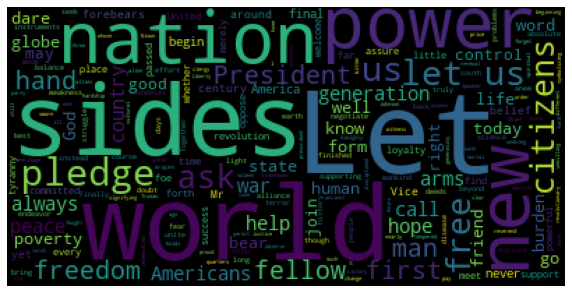

In [41]:
#Kennedy
wordcloud1= WordCloud().generate(words_kennedy_text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud1, interpolation = None)
plt.axis("off")
plt.show()

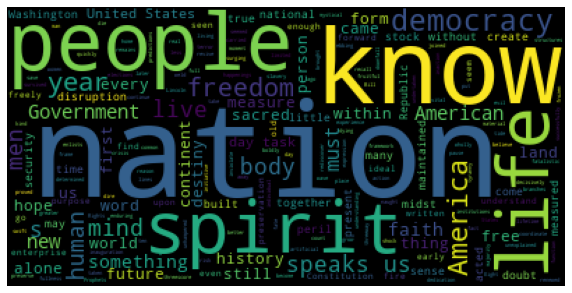

In [42]:
#Roosevelt
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation=None)
plt.axis('off')
plt.show()

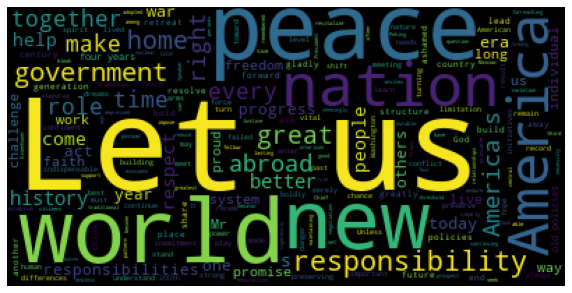

In [43]:
wordcloud2= WordCloud().generate(words_nixon_text)

# Display the generated image:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2, interpolation = None)
plt.axis("off")
plt.show()